# EDA - SECOND PROJECT DATA ANALYTICS - HENRY 2023

## Importación de librerias

Se importan las librerias que vamos a utilizar en el proyecto.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## EDA DF_FACTS_HOMICIDES

Se realiza el EDA al archivo de homicidios.xlsx, primero que todo pasandolo a formato dataframe para poder analizar y manipularlo.

In [2]:
df_facts_homicides = pd.read_excel('02_Data/homicidios.xlsx') 

Verificamos que tiene en su cabecera principal

In [3]:
df_facts_homicides.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


### Resumen del dataframe

Se genera un pequeño resumen del contenido que tiene el dataframe, tipos de datos de cada columna y los valores que se encuentran nulos.

In [14]:
df_facts_homicides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     695 non-null    object        
 1   N_VICTIMAS             695 non-null    int64         
 2   FECHA                  695 non-null    datetime64[ns]
 3   AAAA                   695 non-null    int64         
 4   MM                     695 non-null    int64         
 5   DD                     695 non-null    int64         
 6   HORA                   695 non-null    object        
 7   HH                     695 non-null    int64         
 8   LUGAR_DEL_HECHO        695 non-null    object        
 9   TIPO_DE_CALLE          695 non-null    object        
 10  Calle                  694 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  524 non-null    object        
 13  Direc

### Verificación de Outliers

Verificamos si hay outliers en las columnas de tipo de datos numéricos. Se evidencia que no hay valores outliers.

c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

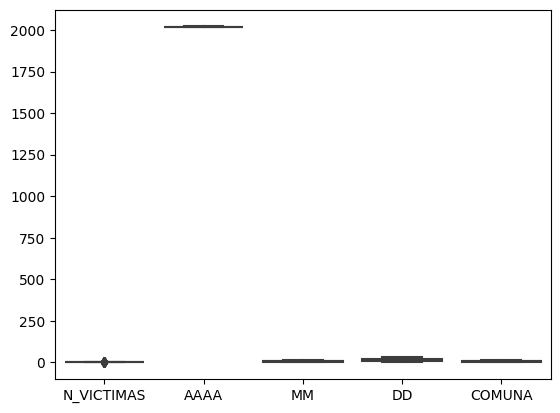

In [15]:
# Selecciona las dos columnas que deseas analizar
select_columns_outliers = ["N_VICTIMAS", "AAAA", "MM", "DD", "COMUNA"]
df_facts_homicides_outliers = df_facts_homicides[select_columns_outliers]

# Crea un box plot para visualizar los outliers de las columnas seleccionadas
sns.boxplot(data=df_facts_homicides_outliers)
plt.show()

### Verificación de filas duplicadas

Verificamos filas con registros duplicadas en el dataframe

In [16]:
duplicates_rows_facts_homicides = df_facts_homicides[df_facts_homicides.duplicated()]
duplicates_rows_facts_homicides

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


### Verificación de valores faltantes

Verificamos en el resumen del dataframe que las columnas Calle, Altura y Cruce tienen valores nulos los cuales vamos a dejar sin inputar ya que estariamos eliminando valores importantes para el análisis correspondiente a este proyecto. 

## Gráficas para analizar el dataframe

Se procede a realizar un análisis del dataframe por medio de gráficas de barras, barras apiladas y lineas para realizar la exploración de los datos a profundidad y comprender la relación entre variables cualitativas y cuantitativas.

#### Suma de víctimas por año

En este apartado se muestra el total de víctimas mortales entre el 2016 al 2021 desglosado por años en una gráfica de barras en donde se identifica que la cantidad de víctimas mortales en los últimos tres años (2019-2021) decreció considerablemente respecto a los ultimos tres años anteriores (2016-2018). Pero si analizamos el ultimo año las víctimas han aumentado.

c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

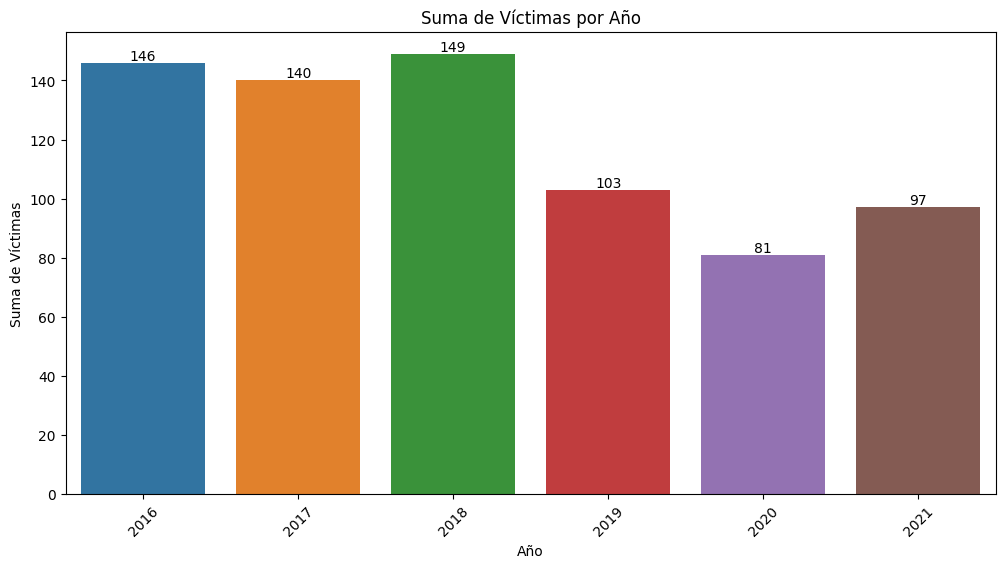

In [18]:
# Convertir la columna 'FECHA' al tipo de dato datetime
df_facts_homicides['FECHA'] = pd.to_datetime(df_facts_homicides['FECHA'])

# Extraer el año de la columna 'FECHA'
df_facts_homicides['AÑO'] = df_facts_homicides['FECHA'].dt.year

# Calcular la suma de víctimas por año
suma_victimas_por_ano = df_facts_homicides.groupby('AÑO')['N_VICTIMAS'].sum().reset_index()

# Crear el barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=suma_victimas_por_ano, x='AÑO', y='N_VICTIMAS', errorbar=None)
plt.xlabel('Año')
plt.ylabel('Suma de Víctimas')
plt.title('Suma de Víctimas por Año')
plt.xticks(rotation=45)

# Agregar etiquetas de datos en las barras
for barra, cantidad in zip(ax.patches, suma_victimas_por_ano['N_VICTIMAS']):
    altura = barra.get_height()
    ax.annotate(f'{cantidad}', (barra.get_x() + barra.get_width() / 2, altura),
                ha='center', va='bottom')

plt.show()

Adicionalmente se realiza un gráfico de lineas para calcular la tasa de crecimiento o decrecimiento en cuanto a la cantidad de víctimas mortales con respecto al año anterior, en donde se evidencia una fuerte disminución entre el 2018 al 2020 siendo mas pronunciada la disminución en el 2019 pero en contrapartida un fuerte aumento entre el 2020 al 2021.

c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_

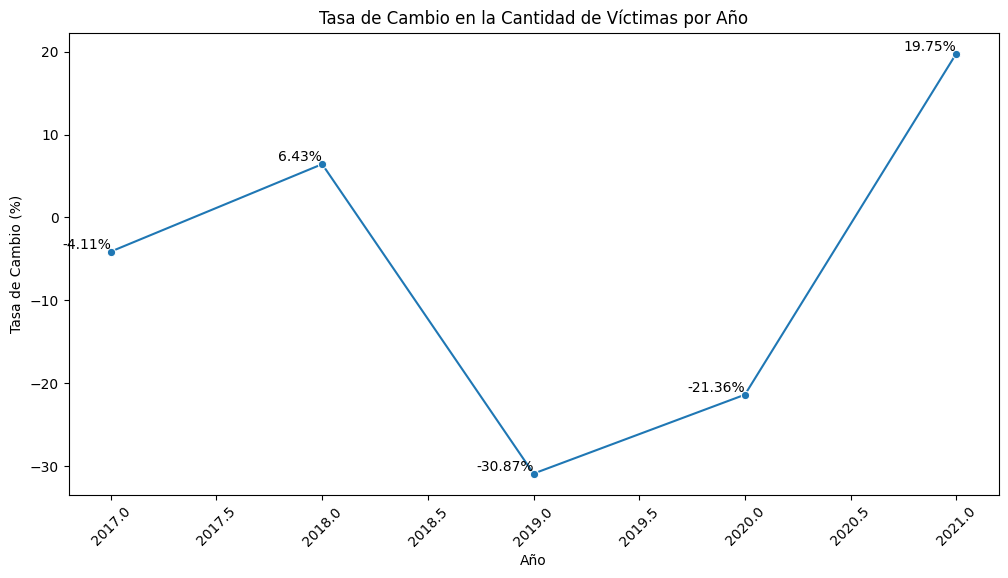

In [19]:
# Convertir la columna 'FECHA' al tipo de dato datetime
df_facts_homicides['FECHA'] = pd.to_datetime(df_facts_homicides['FECHA'])

# Ordenar el DataFrame por año
df_facts_homicides.sort_values(by='AÑO', inplace=True)

# Calcular la suma de víctimas por año
suma_victimas_por_ano = df_facts_homicides.groupby('AÑO')['N_VICTIMAS'].sum().reset_index()

# Calcular la tasa de cambio porcentual respecto al año anterior
suma_victimas_por_ano['Tasa de Cambio'] = suma_victimas_por_ano['N_VICTIMAS'].pct_change() * 100

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=suma_victimas_por_ano, x='AÑO', y='Tasa de Cambio', marker='o')
plt.xlabel('Año')
plt.ylabel('Tasa de Cambio (%)')
plt.title('Tasa de Cambio en la Cantidad de Víctimas por Año')
plt.xticks(rotation=45)

# Agregar etiquetas de datos en los puntos de datos
for x, y in zip(suma_victimas_por_ano['AÑO'], suma_victimas_por_ano['Tasa de Cambio']):
    plt.text(x, y, f'{y:.2f}%', ha='right', va='bottom')

plt.show()

#### Suma de víctimas por mes

En este apartado se realiza un gráfico de barras para mostrar la cantidad de víctimas mortales desglosadas por mes y que comprende los cinco años de data que se tienen, mostrando a nivel general que los meses con mas víctimas mortales son los meses de agosto, noviembre y diciembre respectivamente, siendo diciembre el mes con mayor cantidad de víctimas, el resto de meses se mantienen constantes entre un rango de 50 a 60 muertes mensuales.

c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

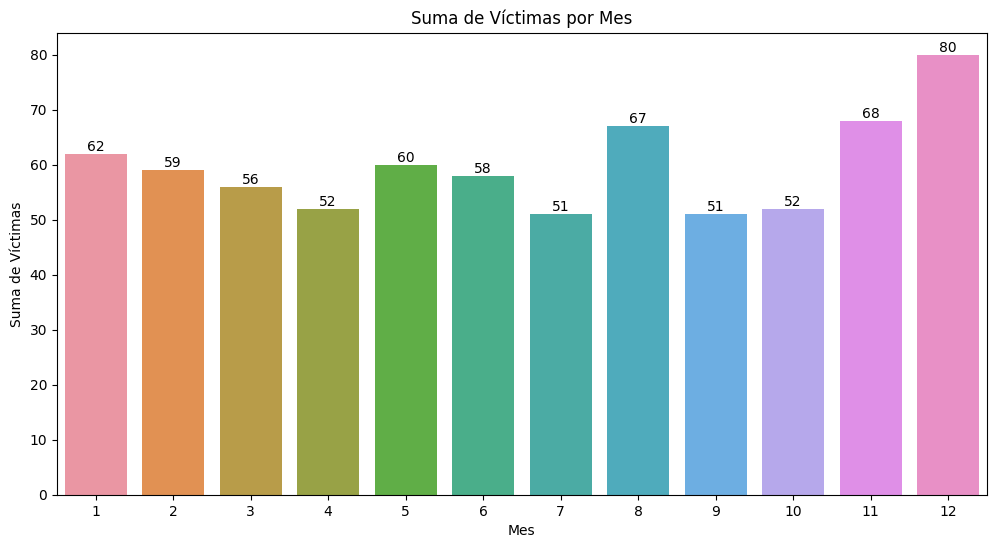

In [21]:
# Supongamos que tienes un DataFrame llamado 'df' con tus datos
# Convierte la columna 'FECHA' al tipo de dato datetime
df_facts_homicides['FECHA'] = pd.to_datetime(df_facts_homicides['FECHA'])

# Extrae el mes de la columna 'FECHA'
df_facts_homicides['MES'] = df_facts_homicides['FECHA'].dt.month

# Agrupa por mes y calcula la suma de 'N_VICTIMAS'
suma_victimas_por_mes = df_facts_homicides.groupby('MES')['N_VICTIMAS'].sum().reset_index()

# Crea un barplot para la suma de víctimas por mes
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=suma_victimas_por_mes, x='MES', y='N_VICTIMAS', errorbar=None)
plt.xlabel('Mes')
plt.ylabel('Suma de Víctimas')
plt.title('Suma de Víctimas por Mes')

# Agrega etiquetas de datos en las barras
for barra, cantidad in zip(ax.patches, suma_victimas_por_mes['N_VICTIMAS']):
    altura = barra.get_height()
    ax.annotate(f'{cantidad}', (barra.get_x() + barra.get_width() / 2, altura),
                ha='center', va='bottom')

plt.show()

En este apartado se hace uso de un gráfico de lineas para mostrar la variación porcentual con respecto al mes anterior y la cantidad de víctimas mortales, se puede observar que hubo una fuerte disminución entre agosto y septiembre pero en contrapartida esa disminución vino acompañada en los ultimos tres meses con aproximadamente una duplicación de victimas mortales como se visualiza en la gráfica.

c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_

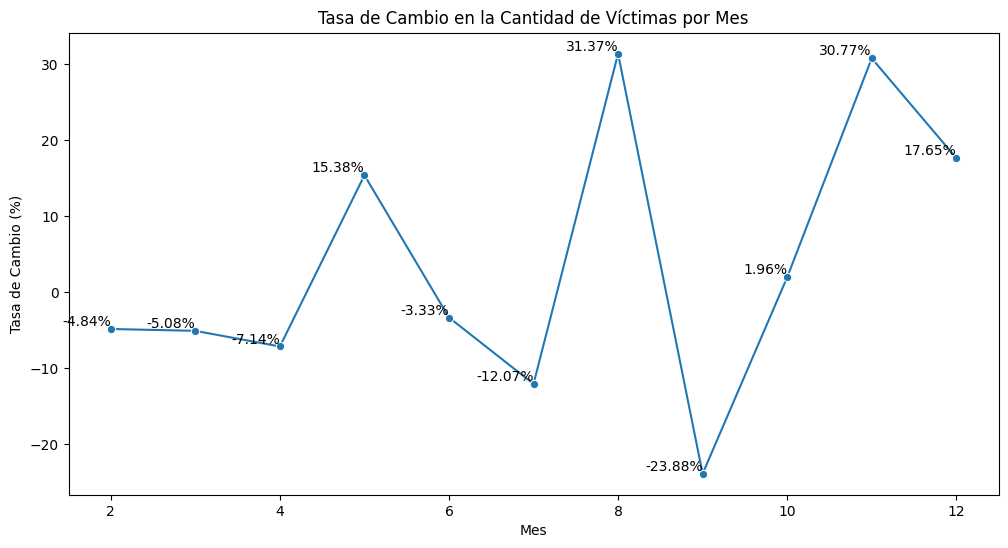

In [22]:
# Convierte la columna 'FECHA' al tipo de dato datetime
df_facts_homicides['FECHA'] = pd.to_datetime(df_facts_homicides['FECHA'])

# Extrae el mes de la columna 'FECHA'
df_facts_homicides['MES'] = df_facts_homicides['FECHA'].dt.month

# Agrupa por mes y calcula la suma de 'N_VICTIMAS'
suma_victimas_por_mes = df_facts_homicides.groupby('MES')['N_VICTIMAS'].sum().reset_index()

# Calcular la tasa de cambio porcentual respecto al mes anterior
suma_victimas_por_mes['Tasa de Cambio'] = suma_victimas_por_mes['N_VICTIMAS'].pct_change() * 100

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=suma_victimas_por_mes, x='MES', y='Tasa de Cambio', marker='o')
plt.xlabel('Mes')
plt.ylabel('Tasa de Cambio (%)')
plt.title('Tasa de Cambio en la Cantidad de Víctimas por Mes')

# Agregar etiquetas de datos en los puntos de datos
for x, y in zip(suma_victimas_por_mes['MES'], suma_victimas_por_mes['Tasa de Cambio']):
    plt.text(x, y, f'{y:.2f}%', ha='right', va='bottom')

plt.show()

#### Suma de víctimas por día

En este apartado se realiza el análisis de la cantidad de víctimas mortales por día durante los cinco años mediante un gráfico de barras, se evidencia una fuerte variación en los datos con muchas crestas y valles y que si la representamos en forma de gráfico de lineas va a ser muy parecida a una onda, no sin antes evidenciar que el día con mayor cantidad de muertes es el día 20 de cada mes y los 31 de cada mes es el día con menor cantidad de víctimas mortales.

c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

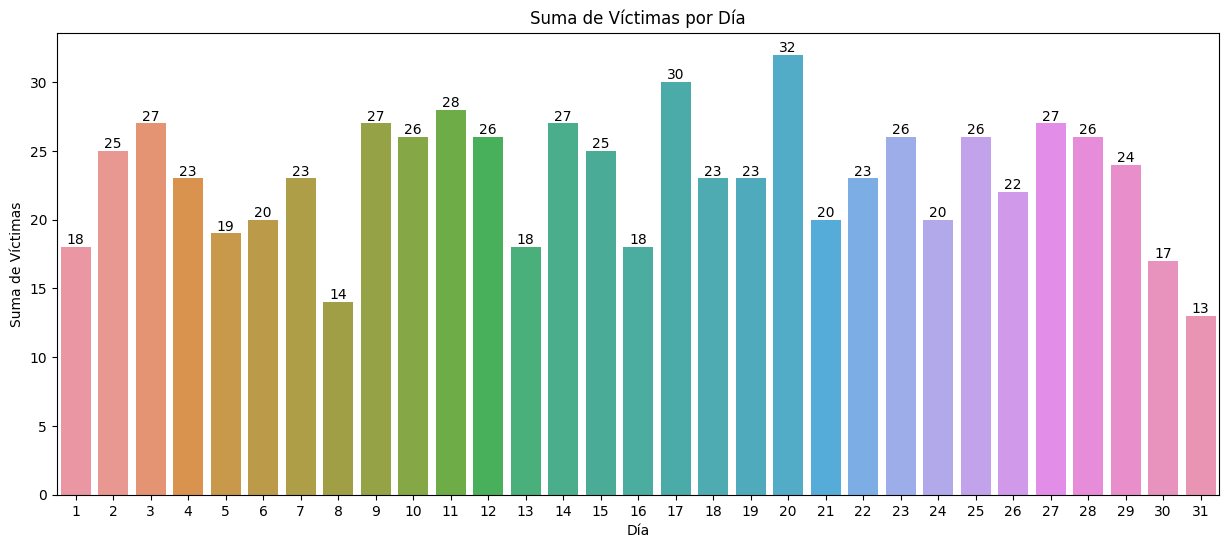

In [24]:
# Convierte la columna 'FECHA' al tipo de dato datetime
df_facts_homicides['FECHA'] = pd.to_datetime(df_facts_homicides['FECHA'])

# Extrae el día de la columna 'FECHA'
df_facts_homicides['DIA'] = df_facts_homicides['FECHA'].dt.day

# Agrupa por día y calcula la suma de 'N_VICTIMAS'
suma_victimas_por_dia = df_facts_homicides.groupby('DIA')['N_VICTIMAS'].sum().reset_index()

# Crea un barplot para la suma de víctimas por día
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=suma_victimas_por_dia, x='DIA', y='N_VICTIMAS', errorbar=None)
plt.xlabel('Día')
plt.ylabel('Suma de Víctimas')
plt.title('Suma de Víctimas por Día')

# Agrega etiquetas de datos en las barras
for barra, cantidad in zip(ax.patches, suma_victimas_por_dia['N_VICTIMAS']):
    altura = barra.get_height()
    ax.annotate(f'{cantidad}', (barra.get_x() + barra.get_width() / 2, altura),
                ha='center', va='bottom')

plt.show()

#### Suma de víctimas por franja horaria

En este apartado se realiza un análisis mediante un gráfico de barras con la cantidad de víctimas mortales respecto a la franja horaria en donde sucedió el accidente, evidenciando que la franja horario con mayor registro de víctimas mortales es entre las 5 a las 7 de la mañana, esto puede ser debido a que a esa hora se presenta la hora pico de tráfico y la mayoría de las personas van rumbo a su trabajo. y las franjas en donde menos ocurren accidentes con víctimas mortales son entre la 1 a las 2 de la tarde (esto puede deberse a que a esa hora muchas personas se encuentran en su horario de almuerzo) y entre las 2 a 3 de la mañana (debido a la poca cantidad de tráfico que hay a esa hora).

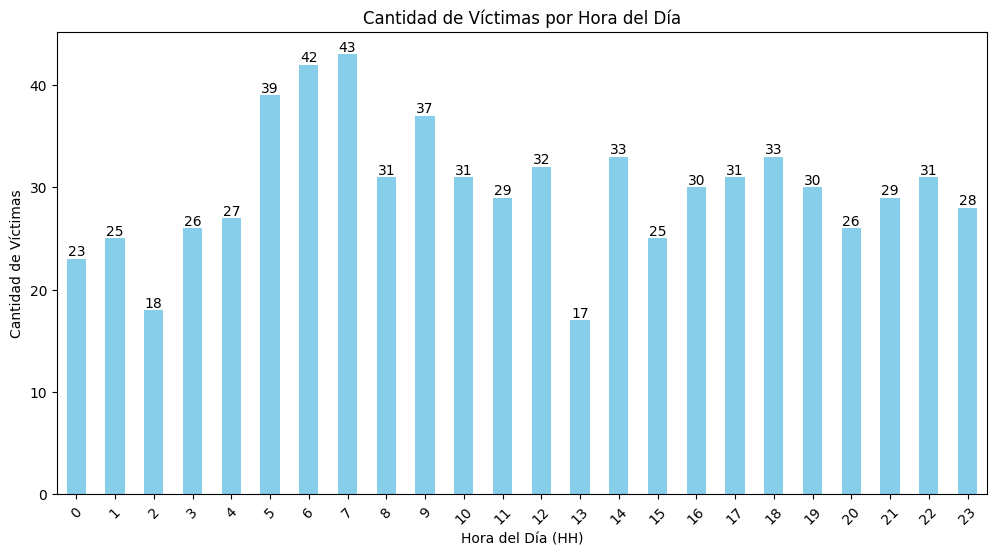

In [25]:
# Supongamos que tienes un DataFrame llamado df con tus datos

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
df_facts_homicides.groupby('HH')['N_VICTIMAS'].sum().plot(kind='bar', color='skyblue')
plt.xlabel('Hora del Día (HH)')
plt.ylabel('Cantidad de Víctimas')
plt.title('Cantidad de Víctimas por Hora del Día')
plt.xticks(rotation=45)

# Agregar etiquetas de datos en las barras
for i, v in enumerate(df_facts_homicides.groupby('HH')['N_VICTIMAS'].sum()):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

#### Suma de víctimas por tipo de calle

En el siguiente apartado analizamos mediante un gráfico de barras la cantidad de víctimas mortales de acuerdo al tipo de calle en donde ocurrió el accidente, evidenciando que el 61.73% de los eventos ocurrió en una avenida, ahora, si sumamos la GRAL PAZ como avenida podemos notar que el 71.23% de los accidentes ocurrio en una avenida y en donde menos ocurrió accidentes fue en las autopisas seguidas de las calles con un 9.50% y un 17.27% respectivamente.

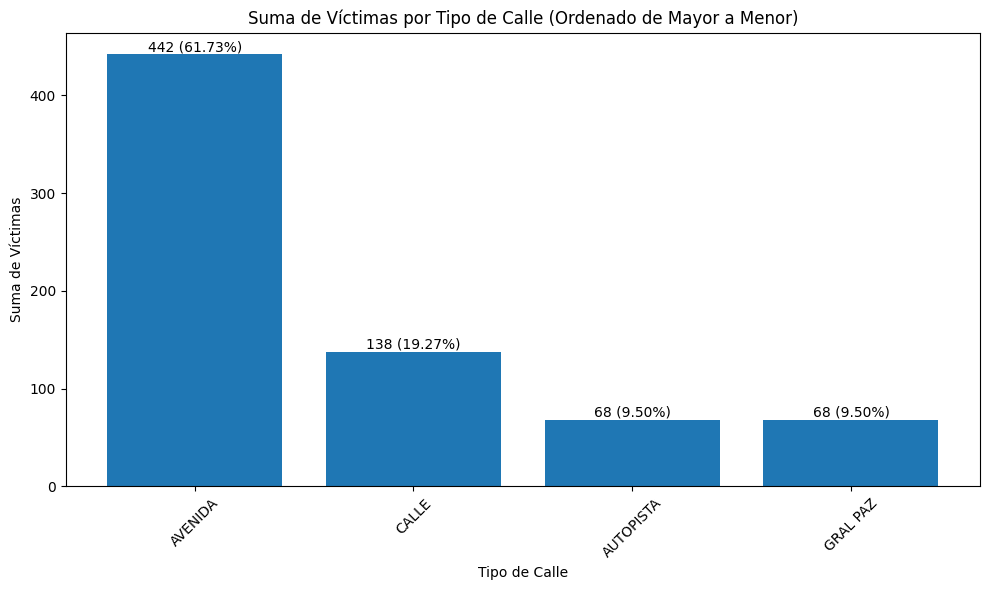

In [16]:
# Calcular la suma de víctimas por tipo de calle
suma_victimas_por_tipo_calle = df_facts_homicides.groupby('TIPO_DE_CALLE')['N_VICTIMAS'].sum().reset_index()

# Ordenar el DataFrame por la suma de víctimas de mayor a menor
suma_victimas_por_tipo_calle = suma_victimas_por_tipo_calle.sort_values(by='N_VICTIMAS', ascending=False)

# Calcular el porcentaje de cada barra en relación con el total de datos
total_victimas = suma_victimas_por_tipo_calle['N_VICTIMAS'].sum()
suma_victimas_por_tipo_calle['Porcentaje'] = (suma_victimas_por_tipo_calle['N_VICTIMAS'] / total_victimas) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(suma_victimas_por_tipo_calle['TIPO_DE_CALLE'], suma_victimas_por_tipo_calle['N_VICTIMAS'])
plt.xlabel('Tipo de Calle')
plt.ylabel('Suma de Víctimas')
plt.title('Suma de Víctimas por Tipo de Calle (Ordenado de Mayor a Menor)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para una mejor legibilidad

# Agregar etiquetas de datos en las barras con el porcentaje
for i, (v, p) in enumerate(zip(suma_victimas_por_tipo_calle['N_VICTIMAS'], suma_victimas_por_tipo_calle['Porcentaje'])):
    plt.text(i, v, f'{v} ({p:.2f}%)', ha='center', va='bottom')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Suma de víctimas por Comuna

En este apartado se analiza la cantidad de víctimas mortales por comuna evidenciando que las comunas 1, 4, 9, 8 y 7 aportan aprox el 50% de víctimas mortales siendo la 1 y la 4 las comunas críticas con un 12.99% y 11.03% respectivamente y las comunas en donde menos se presentan víctimas mortales son en la 6, 5 y 2 respectivamente.

<Figure size 1200x600 with 0 Axes>

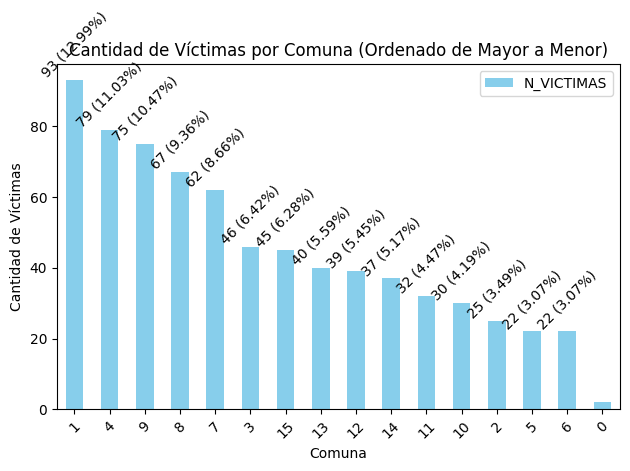

In [26]:
# Calcular la suma de víctimas por comuna
suma_victimas_por_comuna = df_facts_homicides.groupby('COMUNA')['N_VICTIMAS'].sum().reset_index()

# Ordenar el DataFrame por la suma de víctimas de mayor a menor
suma_victimas_por_comuna = suma_victimas_por_comuna.sort_values(by='N_VICTIMAS', ascending=False)

# Calcular el porcentaje de cada barra en relación con el total de datos
total_victimas = suma_victimas_por_comuna['N_VICTIMAS'].sum()
suma_victimas_por_comuna['Porcentaje'] = (suma_victimas_por_comuna['N_VICTIMAS'] / total_victimas) * 100

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = suma_victimas_por_comuna.plot(kind='bar', x='COMUNA', y='N_VICTIMAS', color='skyblue')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Víctimas')
plt.title('Cantidad de Víctimas por Comuna (Ordenado de Mayor a Menor)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x

# Agregar etiquetas de datos en las barras con el porcentaje en ángulo
for i, (v, p) in enumerate(zip(suma_victimas_por_comuna['N_VICTIMAS'], suma_victimas_por_comuna['Porcentaje'])):
    if v > total_victimas * 0.02:  # Mostrar etiquetas solo para barras grandes (ajusta este valor según tus necesidades)
        ax.annotate(f'{v} ({p:.2f}%)', (i, v), ha='center', va='bottom', rotation=45)

plt.tight_layout()
plt.show()

#### Suma de víctimas por tipo de participantes

En este apartado mediante un gráfico de barras analizamos la cantidad de víctimas de acuerdo a los participantes del accidente, en este caso nos encontramos que el peaton junto con los vehículos de pasajeros son los que tienen mayor porcentaje de participantes en los accidentes con un 16.33% sobre el total de las víctimas siendo el peaton la víctima y el vehiculo de pasajeros el acusado, seguido de moto-autos y moto-cargas con un 13.06% y 12.44% respectivamente en donde las víctimas son los usuarios de motocicletas tambien con una rúbrica importante.

C:\Users\haide\AppData\Local\Temp\ipykernel_15036\4178314654.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_15_participantes['Porcentaje'] = (top_15_participantes['N_VICTIMAS'] / total_victimas) * 100


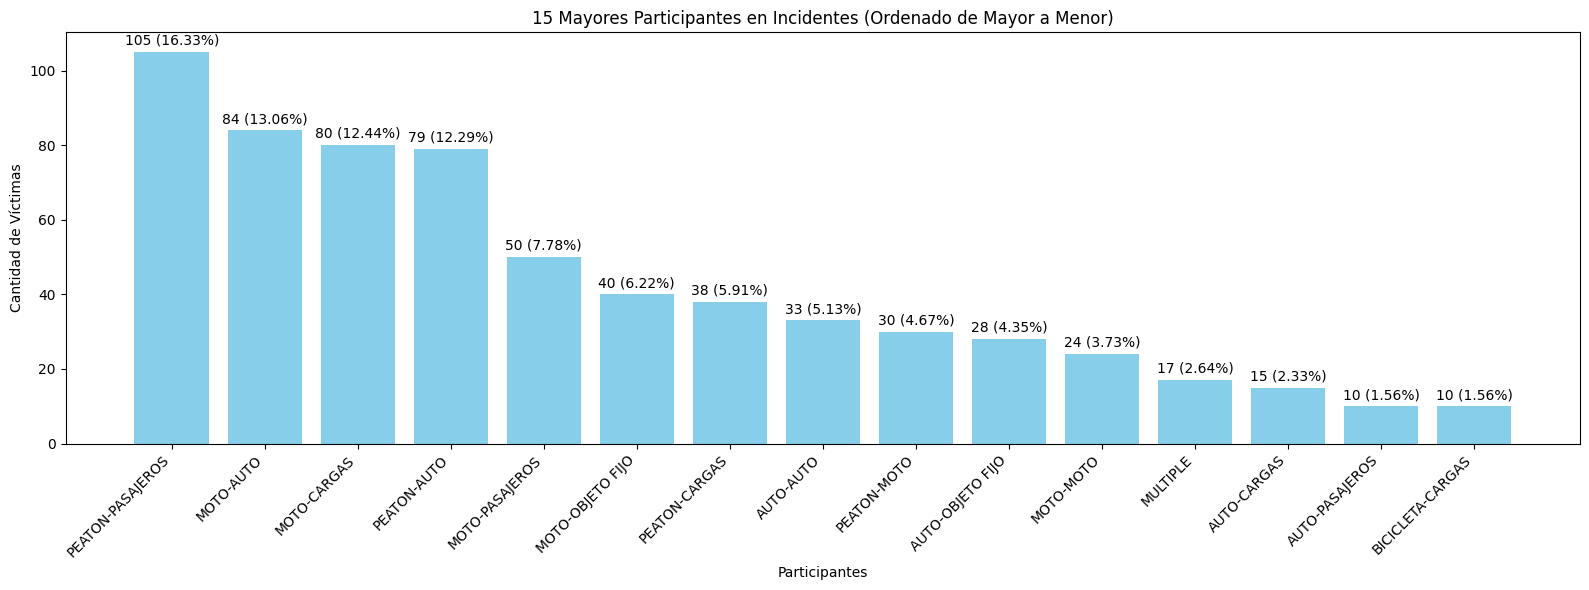

In [27]:
# Calcular la suma de víctimas por participantes y ordenar de mayor a menor
suma_victimas_por_participantes = df_facts_homicides.groupby('PARTICIPANTES')['N_VICTIMAS'].sum().reset_index()
suma_victimas_por_participantes = suma_victimas_por_participantes.sort_values(by='N_VICTIMAS', ascending=False)

# Tomar las 15 primeras filas (las mayores)
top_15_participantes = suma_victimas_por_participantes.head(15)

# Calcular el porcentaje de cada barra en relación con el total de datos
total_victimas = top_15_participantes['N_VICTIMAS'].sum()
top_15_participantes['Porcentaje'] = (top_15_participantes['N_VICTIMAS'] / total_victimas) * 100

# Aumentar el ancho horizontal de la figura
plt.figure(figsize=(16, 6))

# Crear un gráfico de barras
bars = plt.bar(top_15_participantes['PARTICIPANTES'], top_15_participantes['N_VICTIMAS'], color='skyblue')

plt.xlabel('Participantes')
plt.ylabel('Cantidad de Víctimas')
plt.title('15 Mayores Participantes en Incidentes (Ordenado de Mayor a Menor)')
plt.xticks(rotation=45, ha='right')  # Alinear etiquetas a la derecha

# Agregar etiquetas de datos en las barras con alineación y espaciado
for i, (bar, p) in enumerate(zip(bars, top_15_participantes['Porcentaje'])):
    height = bar.get_height()
    plt.annotate(f'{int(height)} ({p:.2f}%)', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Ajustar espaciado vertical
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Ajustar el diseño para evitar recortar etiquetas
plt.show()

#### Suma de víctimas por Tipo de víctima

Para concluir el gráfico anterior hacemos uso de este gráfico de barras para analizar el porcentaje y cantidad de víctimas de acuerdo al tipo de víctima, corroborando que los motociclistas son los que mayor porcentaje de participación tienen con un 42.04% sobre el total, seguido y con una participación muy importante el peaton con un 37.15%, es decir tan solo estos dos tipos de victima aportan un 79.19% de victimas fatales lo que conlleva a analizar en profundidad las situaciones de estas dos tipos de victimas para reducir estas tasas que en comparación con las demas victimas estan practicamente triplicadas y cuadruplicadas respectivamente.

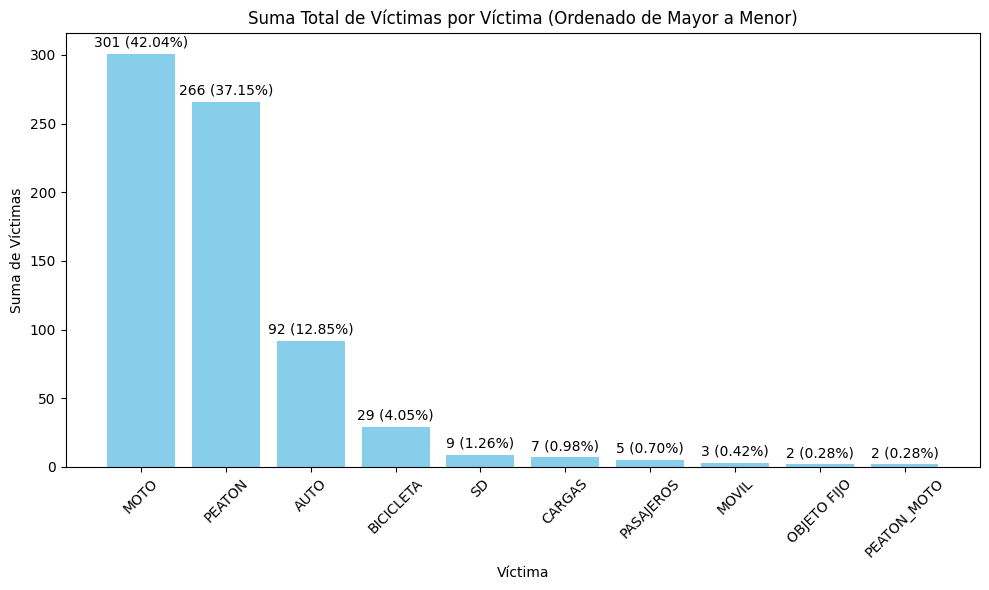

In [28]:
# Agrupar por la columna 'VICTIMA' y calcular la suma de víctimas
suma_victimas_por_victima = df_facts_homicides.groupby('VICTIMA')['N_VICTIMAS'].sum().reset_index()

# Ordenar el DataFrame por la suma de víctimas de mayor a menor
suma_victimas_por_victima = suma_victimas_por_victima.sort_values(by='N_VICTIMAS', ascending=False)

# Calcular el porcentaje de cada barra en relación con el total de datos
total_victimas = suma_victimas_por_victima['N_VICTIMAS'].sum()
suma_victimas_por_victima['Porcentaje'] = (suma_victimas_por_victima['N_VICTIMAS'] / total_victimas) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(suma_victimas_por_victima['VICTIMA'], suma_victimas_por_victima['N_VICTIMAS'], color='skyblue')
plt.xlabel('Víctima')
plt.ylabel('Suma de Víctimas')
plt.title('Suma Total de Víctimas por Víctima (Ordenado de Mayor a Menor)')
plt.xticks(rotation=45)

# Agregar etiquetas de datos en las barras con alineación y espaciado
for i, (bar, p) in enumerate(zip(bars, suma_victimas_por_victima['Porcentaje'])):
    height = bar.get_height()
    plt.annotate(f'{int(height)} ({p:.2f}%)', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Ajustar espaciado vertical
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Suma de víctimas por Tipo de acusado

En el siguiente gráfico evidenciamos que los principales acusados durante los accidentes con víctimas fatales son los autos, vehículos de transporte público y cargas aportando un total de 29.33%, 24.86% y 20.95% respectivamente para un total de 75.14%

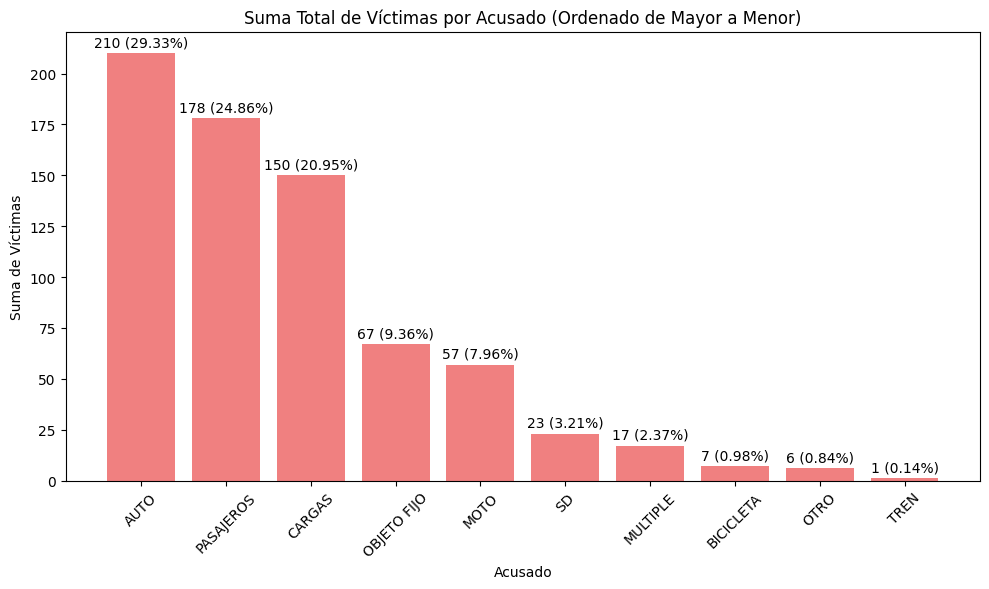

In [29]:
# Agrupar por la columna 'ACUSADO' y calcular la suma de víctimas
suma_victimas_por_acusado = df_facts_homicides.groupby('ACUSADO')['N_VICTIMAS'].sum().reset_index()

# Ordenar el DataFrame por la suma de víctimas de mayor a menor
suma_victimas_por_acusado = suma_victimas_por_acusado.sort_values(by='N_VICTIMAS', ascending=False)

# Calcular el porcentaje de cada barra en relación con el total de datos
total_victimas = suma_victimas_por_acusado['N_VICTIMAS'].sum()
suma_victimas_por_acusado['Porcentaje'] = (suma_victimas_por_acusado['N_VICTIMAS'] / total_victimas) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(suma_victimas_por_acusado['ACUSADO'], suma_victimas_por_acusado['N_VICTIMAS'], color='lightcoral')
plt.xlabel('Acusado')
plt.ylabel('Suma de Víctimas')
plt.title('Suma Total de Víctimas por Acusado (Ordenado de Mayor a Menor)')
plt.xticks(rotation=45)

# Agregar etiquetas de datos en las barras con alineación y espaciado
for i, (bar, p) in enumerate(zip(bars, suma_victimas_por_acusado['Porcentaje'])):
    height = bar.get_height()
    plt.annotate(f'{int(height)} ({p:.2f}%)', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Ajustar espaciado vertical
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Suma de víctimas por año de acuerdo a franja horaria

En este gráfico de barras apiladas podemos evidenciar el porcentaje de víctimas fatales por franja horaria desglosado por años y seleccionando las 5 categorías con mayor participación para un análisis mas detallado en donde no se encuentra un patron claro pero si la variación que tuvo cada una de las 5 categorías mas importante en los últimos 5 años. 

<Figure size 1500x600 with 0 Axes>

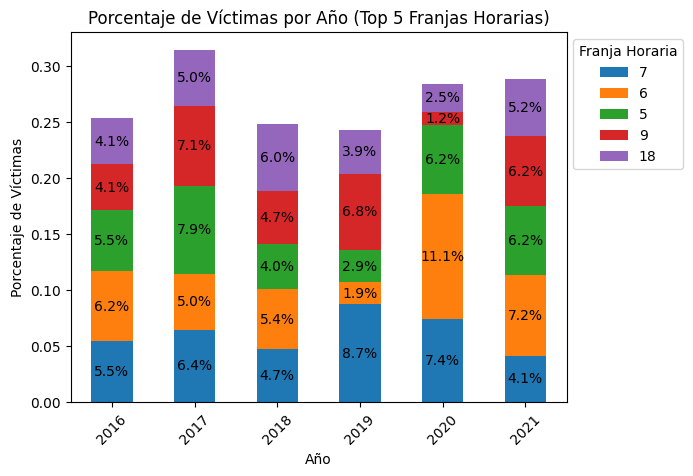

In [30]:
# Agrupar por el año y la columna 'HH' y calcular la suma de la columna 'N_VICTIMAS'
suma_muertes_por_ano_y_franja = df_facts_homicides.groupby(['AAAA', 'HH'])['N_VICTIMAS'].sum().unstack(fill_value=0)

# Calcular la suma total de víctimas para cada categoría "HH"
suma_total_por_categoria_franja = suma_muertes_por_ano_y_franja.sum(axis=0)

# Ordenar las categorías por la suma total de víctimas de mayor a menor
categorias_ordenadas_franja = suma_total_por_categoria_franja.sort_values(ascending=False).index

# Tomar solo las 5 categorías más grandes
categorias_top5_franja = categorias_ordenadas_franja[:5]

# Filtrar el DataFrame para incluir solo las categorías top 5
suma_muertes_top5_franja = suma_muertes_por_ano_y_franja[categorias_top5_franja]

# Calcular el total de víctimas por año
total_victimas_por_ano = suma_muertes_por_ano_y_franja.sum(axis=1)

# Crear un gráfico de barras apiladas
plt.figure(figsize=(15, 6))
ax = suma_muertes_top5_franja.div(total_victimas_por_ano, axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Año')
plt.ylabel('Porcentaje de Víctimas')
plt.title('Porcentaje de Víctimas por Año (Top 5 Franjas Horarias)')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Agregar etiquetas de porcentaje en las barras apiladas
for idx, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x(), p.get_y()
    if height > 0:
        porcentaje = height * 100
        ax.annotate(f'{porcentaje:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

# Agregar leyenda
plt.legend(title='Franja Horaria', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

#### Suma de víctimas por año de acuerdo a la comuna

En este gráfico de barras apiladas podemos evidenciar el porcentaje de víctimas fatales de acuerdo a la comuna desglosado por años para un análisis mas detallado y dejando las 5 categorías con mayor participación. por ejemplo se evidencia que la comuna 1 que fue en donde evidenciamos en nuestro gráfico de barras con mas víctimas mortales a disminuido paulatinamente con el pasar de los años aproximadamente un 6% y la comuna 4 por el contrario aumento bruscamente el último año.

<Figure size 1500x600 with 0 Axes>

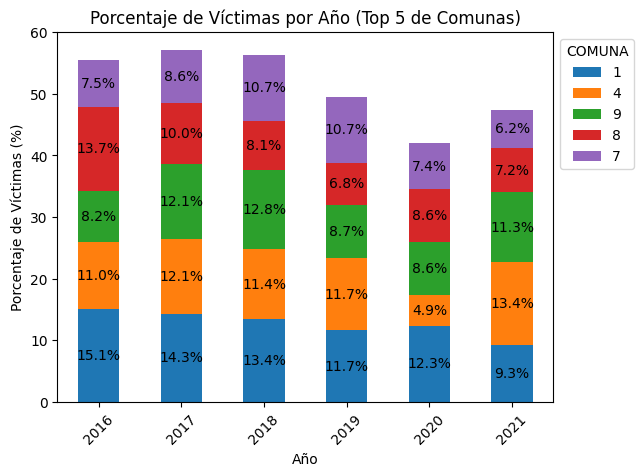

In [31]:
# Agrupar por el año y la víctima y calcular la suma de la columna 'N_VICTIMAS'
suma_muertes_por_ano_y_comuna = df_facts_homicides.groupby(['AAAA', 'COMUNA'])['N_VICTIMAS'].sum().unstack(fill_value=0)

# Calcular la suma total de víctimas para cada año
suma_total_por_ano = suma_muertes_por_ano_y_comuna.sum(axis=1)

# Crear un DataFrame de porcentajes
porcentaje_por_ano_y_comuna = suma_muertes_por_ano_y_comuna.div(suma_total_por_ano, axis=0) * 100
# Selecciona las 5 comunas principales en función del porcentaje total de víctimas
top_5_comunas = porcentaje_por_ano_y_comuna.sum().nlargest(5).index

# Filtra el DataFrame para incluir solo las 5 comunas principales
porcentaje_top_5_comunas = porcentaje_por_ano_y_comuna[top_5_comunas]

# Crea un gráfico de barras apiladas para las 5 comunas principales
plt.figure(figsize=(15, 6))
ax = porcentaje_top_5_comunas.plot(kind='bar', stacked=True)
plt.xlabel('Año')
plt.ylabel('Porcentaje de Víctimas (%)')
plt.title('Porcentaje de Víctimas por Año (Top 5 de Comunas)')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Agregar etiquetas de porcentaje en las barras apiladas
for idx, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x(), p.get_y()
    if height > 0:
        porcentaje = height
        ax.annotate(f'{porcentaje:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

# Agregar leyenda
plt.legend(title='COMUNA', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

#### Suma de víctimas por año de acuerdo al tipo de calle

En este gráfico de barras apiladas podemos evidenciar el porcentaje de víctimas fatales de acuerdo al tipo de calle en donde ocurrieron los accidentes desglosado por años para un análisis mas detallado, evidenciamos por ejemplo que para el caso de las avenidas ha permanecido constante en el transcurso de los 5 años y las calles tambien han permanecido en un valor constante pero presentando una disminución con respecto al último año del 9% aprox.

<Figure size 1500x600 with 0 Axes>

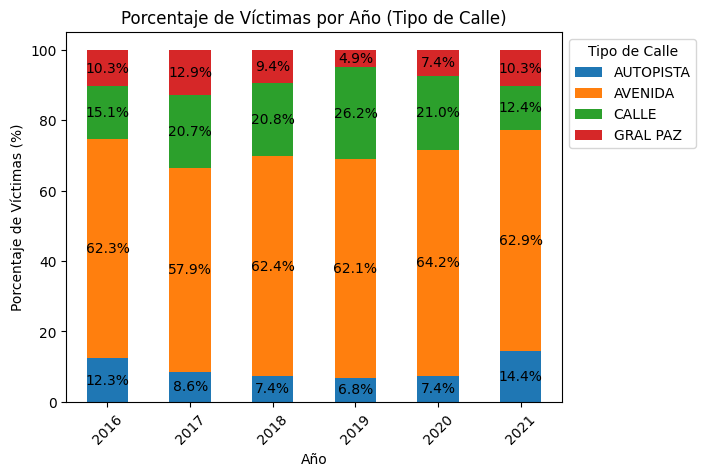

In [32]:
# Agrupar por el año y la categoría 'TIPO_DE_CALLE' y calcular la suma de la columna 'N_VICTIMAS'
suma_muertes_por_ano_y_tipo_de_calle = df_facts_homicides.groupby(['AAAA', 'TIPO_DE_CALLE'])['N_VICTIMAS'].sum().unstack(fill_value=0)

# Calcular la suma total de víctimas para cada año
suma_total_por_ano = suma_muertes_por_ano_y_tipo_de_calle.sum(axis=1)

# Calcular el porcentaje de cada categoría por año
porcentaje_por_ano_y_tipo_de_calle = (suma_muertes_por_ano_y_tipo_de_calle.div(suma_total_por_ano, axis=0) * 100).fillna(0)

# Crear un gráfico de barras apiladas
plt.figure(figsize=(15, 6))
ax = porcentaje_por_ano_y_tipo_de_calle.plot(kind='bar', stacked=True)
plt.xlabel('Año')
plt.ylabel('Porcentaje de Víctimas (%)')
plt.title('Porcentaje de Víctimas por Año (Tipo de Calle)')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Agregar etiquetas de porcentaje en las barras apiladas
for idx, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x(), p.get_y()
    if height > 0:
        porcentaje = height
        ax.annotate(f'{porcentaje:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

# Agregar leyenda
plt.legend(title='Tipo de Calle', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

#### Suma de víctimas por año de acuerdo a los participantes

En este gráfico de barras apiladas podemos evidenciar el porcentaje de víctimas fatales de acuerdo a los participantes en los accidentes desglosado por años para un análisis mas detallado. Se puede evidenciar que para la categoría mas grande en este caso peaton-pasajeros ha sido muy variable pero la tendencia es a la baja ya que si comparamos el 2021 con el 2016 hay una disminución aproximadamente del 5%

<Figure size 1500x600 with 0 Axes>

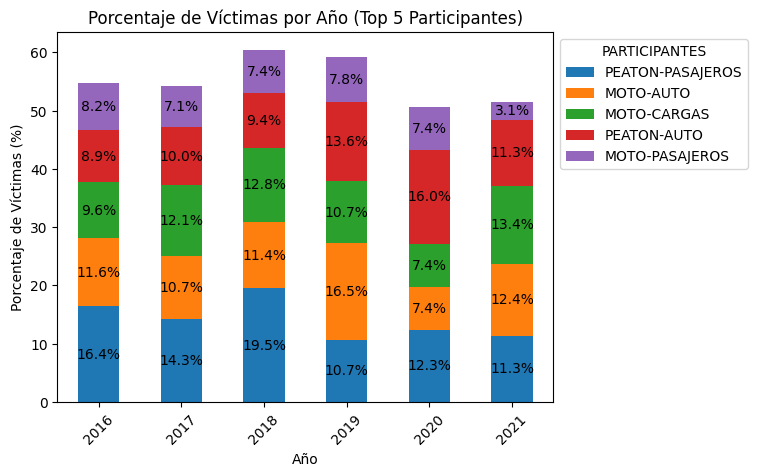

In [33]:
# Agrupar por el año y la columna 'PARTICIPANTES' y calcular la suma de la columna 'N_VICTIMAS'
suma_victimas_por_ano_y_participantes = df_facts_homicides.groupby(['AAAA', 'PARTICIPANTES'])['N_VICTIMAS'].sum().unstack(fill_value=0)

# Calcular la suma total de víctimas para cada año
suma_total_por_ano = suma_victimas_por_ano_y_participantes.sum(axis=1)

# Tomar solo las 5 categorías más grandes
categorias_top5_participantes = suma_victimas_por_ano_y_participantes.sum().nlargest(5).index

# Filtrar el DataFrame para incluir solo las categorías top 5
suma_victimas_top5_participantes = suma_victimas_por_ano_y_participantes[categorias_top5_participantes]

# Calcular el porcentaje de cada categoría por año
porcentaje_por_ano_y_participantes = (suma_victimas_top5_participantes.div(suma_total_por_ano, axis=0) * 100).fillna(0)

# Crear un gráfico de barras apiladas
plt.figure(figsize=(15, 6))
ax = porcentaje_por_ano_y_participantes.plot(kind='bar', stacked=True)
plt.xlabel('Año')
plt.ylabel('Porcentaje de Víctimas (%)')
plt.title('Porcentaje de Víctimas por Año (Top 5 Participantes)')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Agregar etiquetas de porcentaje en las barras apiladas
for idx, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x(), p.get_y()
    if height > 0:
        porcentaje = height
        ax.annotate(f'{porcentaje:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

# Agregar leyenda
plt.legend(title='PARTICIPANTES', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

#### Suma de víctimas por año de acuerdo al tipo de víctima

En este gráfico de barras apiladas podemos evidenciar el porcentaje de víctimas fatales de acuerdo al tipo de víctima en los accidentes desglosado por años para un análisis mas detallado. Podemos evidenciar por ejemplo en el caso de las motos a pesar de que su tendencia ha sido a la baja en el último año ha aumentado aprox. un 64%, en el caso de la segunda categoría mas grande que es el peaton ha logrado un equilibrio en los últimos tres años pero aún con una tasa de participación muy alta.

<Figure size 1500x600 with 0 Axes>

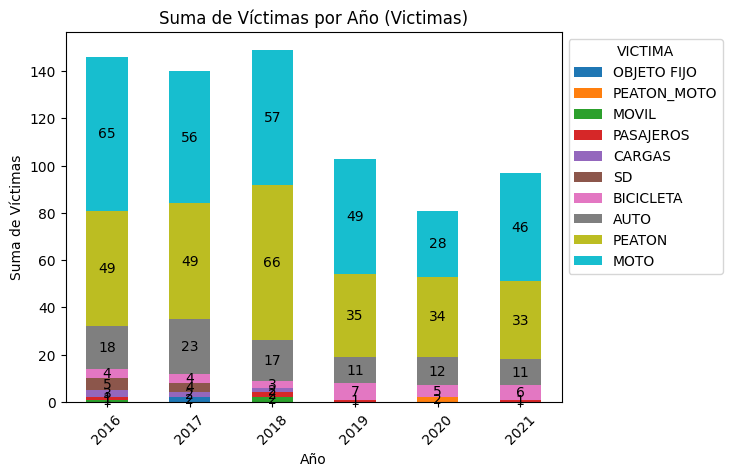

In [34]:
# Agrupar por el año y la víctima y calcular la suma de la columna 'N_VICTIMAS'
suma_muertes_por_ano_y_victima = df_facts_homicides.groupby(['AAAA', 'VICTIMA'])['N_VICTIMAS'].sum().unstack(fill_value=0)

# Calcular la suma total de víctimas para cada categoría "ACUSADO"
suma_total_por_categoria = suma_muertes_por_ano_y_victima.sum(axis=0)

# Ordenar las categorías de menor a mayor suma total de víctimas
categorias_ordenadas = suma_total_por_categoria.sort_values(ascending=True).index

# Reorganizar las columnas del DataFrame en el orden de las categorías ordenadas
suma_muertes_por_ano_y_victima = suma_muertes_por_ano_y_victima[categorias_ordenadas]

# Crear un gráfico de barras apiladas
plt.figure(figsize=(15, 6))
ax = suma_muertes_por_ano_y_victima.plot(kind='bar', stacked=True)
plt.xlabel('Año')
plt.ylabel('Suma de Víctimas')
plt.title('Suma de Víctimas por Año (Victimas)')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Agregar etiquetas de datos en las barras apiladas
for idx, p in enumerate(ax.patches):
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_x(), p.get_y()
    if height > 0:
        ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2), ha='center', va='center')

# Agregar leyenda
plt.legend(title='VICTIMA', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

#### Suma de víctimas por año de acuerdo al tipo de acusado

En este gráfico de barras apiladas podemos evidenciar el porcentaje de víctimas fatales de acuerdo al tipo de acusado en los accidentes desglosado por años para un análisis mas detallado. Por ejemplo para la categoría auto que es la que mayor cantidad de víctimas fatales proporciona se analiza una tendencia a la baja en los últimos 6 años pero el último año ha aumentado levemente, la categoría pasajeros que es el transporte público basicamente si ha logrado una reducción considerable tomando de base tanto el primer año de análisis como el último año y la categoría cargas si se ha mantenido muy variable en los último seis años teniendo picos y valles no tan pronunciados.

<Figure size 1500x600 with 0 Axes>

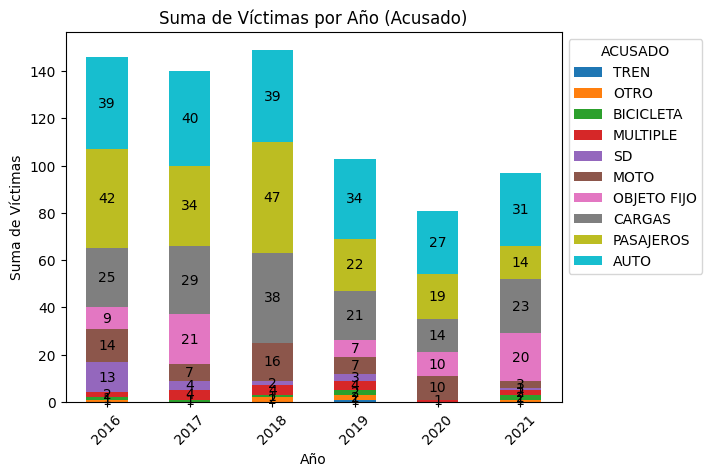

In [35]:
# Agrupar por el año y la víctima y calcular la suma de la columna 'N_VICTIMAS'
suma_muertes_por_ano_y_acusado = df_facts_homicides.groupby(['AAAA', 'ACUSADO'])['N_VICTIMAS'].sum().unstack(fill_value=0)

# Calcular la suma total de víctimas para cada categoría "ACUSADO"
suma_total_por_categoria_acusado = suma_muertes_por_ano_y_acusado.sum(axis=0)

# Ordenar las categorías de menor a mayor suma total de víctimas
categorias_ordenadas_acusado = suma_total_por_categoria_acusado.sort_values(ascending=True).index

# Reorganizar las columnas del DataFrame en el orden de las categorías ordenadas
suma_muertes_por_ano_y_acusado = suma_muertes_por_ano_y_acusado[categorias_ordenadas_acusado]

# Crear un gráfico de barras apiladas
plt.figure(figsize=(15, 6))
ax = suma_muertes_por_ano_y_acusado.plot(kind='bar', stacked=True)
plt.xlabel('Año')
plt.ylabel('Suma de Víctimas')
plt.title('Suma de Víctimas por Año (Acusado)')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Agregar etiquetas de datos en las barras apiladas
for idx, p in enumerate(ax.patches):
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_x(), p.get_y()
    if height > 0:
        ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2), ha='center', va='center')

# Agregar leyenda
plt.legend(title='ACUSADO', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

#### Variación cantidad de víctimas por mes desglosado a través de los años

El siguiente gráfico de lineas muestra la cantidad de víctimas fatales analizadas mes a mes durante todos los años de data (2016-2021), en donde se puede evidenciar el mes de diciembre del año 2020 hubo un aumento significativo en la cantidad de víctimas y tambien los últimos dos meses del año 2021 la curva tiende a la alza.

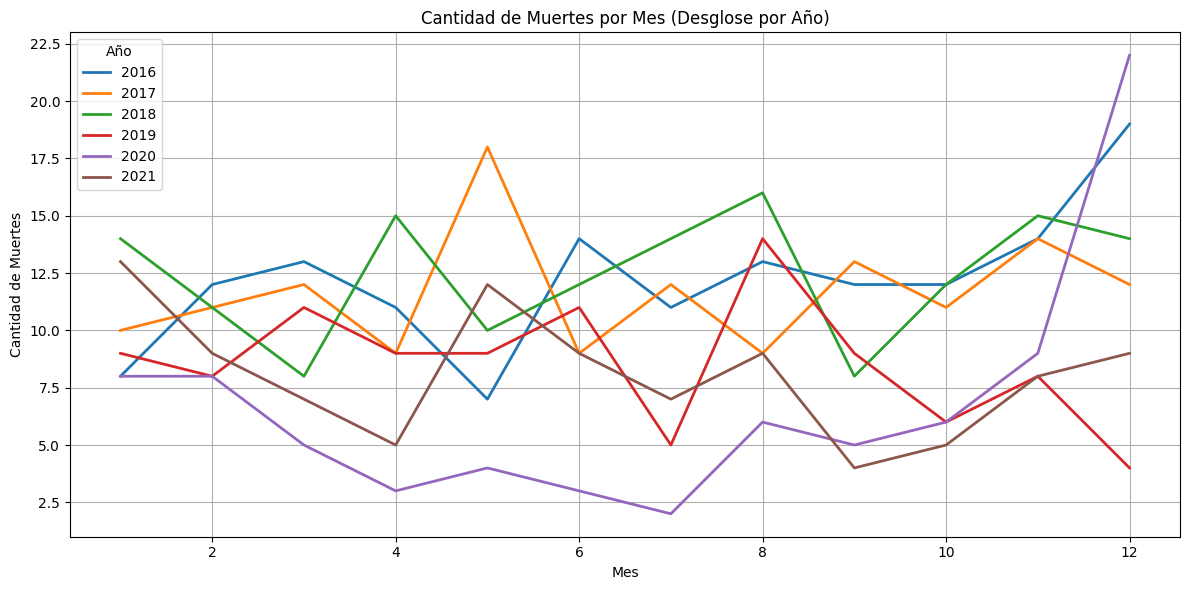

In [36]:
# Crear una nueva columna 'MES' y 'AÑO' a partir de la columna 'FECHA'
df_facts_homicides['MES'] = df_facts_homicides['FECHA'].dt.month
df_facts_homicides['AÑO'] = df_facts_homicides['FECHA'].dt.year

# Agrupar por 'AÑO' y 'MES' y calcular la suma de 'N_VICTIMAS' para cada grupo
muertes_por_mes_y_año = df_facts_homicides.groupby(['AÑO', 'MES'])['N_VICTIMAS'].sum().reset_index()

# Crear un gráfico de líneas
plt.figure(figsize=(12, 6))

# Iterar a través de cada año para crear una línea separada en el gráfico
for año, datos_año in muertes_por_mes_y_año.groupby('AÑO'):
    plt.plot(datos_año['MES'], datos_año['N_VICTIMAS'], label=str(año), linewidth=2.0)

# Personalizar el gráfico
plt.xlabel('Mes')
plt.ylabel('Cantidad de Muertes')
plt.title('Cantidad de Muertes por Mes (Desglose por Año)')
plt.legend(title='Año')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Variación cantidad de victimas por día a través de los años

El siguiente gráfico de lineas muestra la cantidad de víctimas fatales por día y desglosados por año, en donde se puede analizar año por año la variacion que hubo en cuanto a víctimas fatales diariamente.

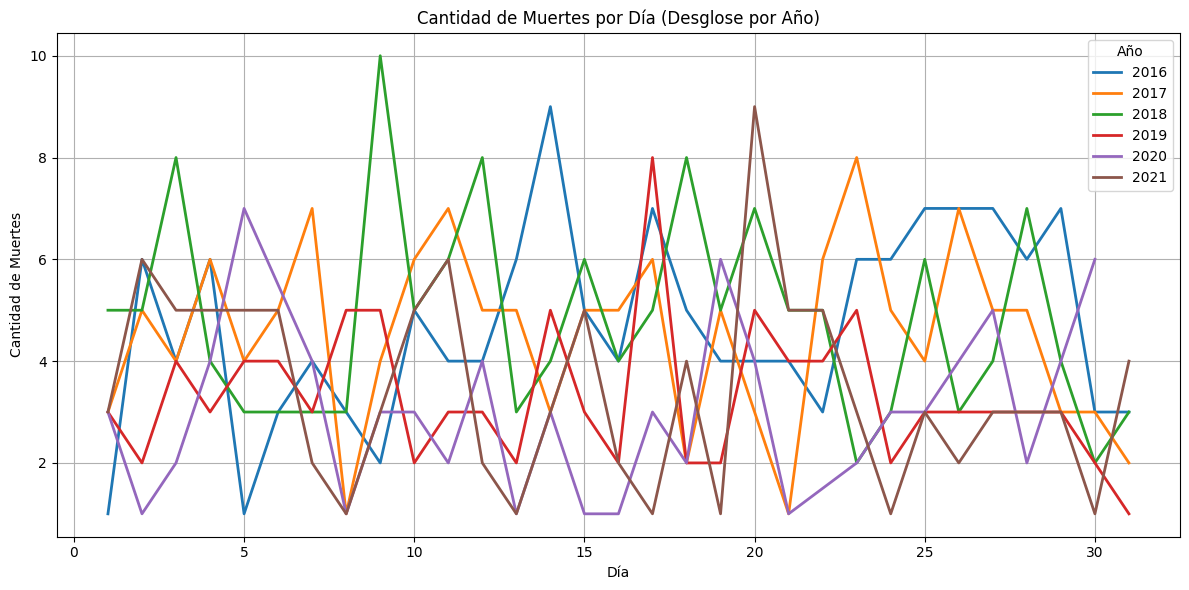

In [37]:
# Crear una nueva columna 'DIA', 'MES' y 'AÑO' a partir de la columna 'FECHA'
df_facts_homicides['DIA'] = df_facts_homicides['FECHA'].dt.day
df_facts_homicides['AÑO'] = df_facts_homicides['FECHA'].dt.year

# Agrupar por 'AÑO', 'MES' y 'DIA' y calcular la suma de 'N_VICTIMAS' para cada grupo
muertes_por_dia_mes_año = df_facts_homicides.groupby(['AÑO', 'DIA'])['N_VICTIMAS'].sum().reset_index()

# Crear un gráfico de líneas
plt.figure(figsize=(12, 6))

# Iterar a través de cada año para crear una línea separada en el gráfico
for año, datos_año in muertes_por_dia_mes_año.groupby('AÑO'):
    plt.plot(
        datos_año['DIA'], datos_año['N_VICTIMAS'], 
        label=str(año), linewidth=2.0  # Grosor de línea = 2.0
    )

# Personalizar el gráfico
plt.xlabel('Día')
plt.ylabel('Cantidad de Muertes')
plt.title('Cantidad de Muertes por Día (Desglose por Año)')
plt.legend(title='Año')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Variación cantidad de victimas por comuna a través de los años

El siguiente gráfico de lineas muestra la cantidad de víctimas fatales de acuerdo a las comunas y desglosados por año, en donde se puede analizar año por año la variación que hubo en cuanto a victimas fatales en las 5 categorías con los indicadores mas altos.

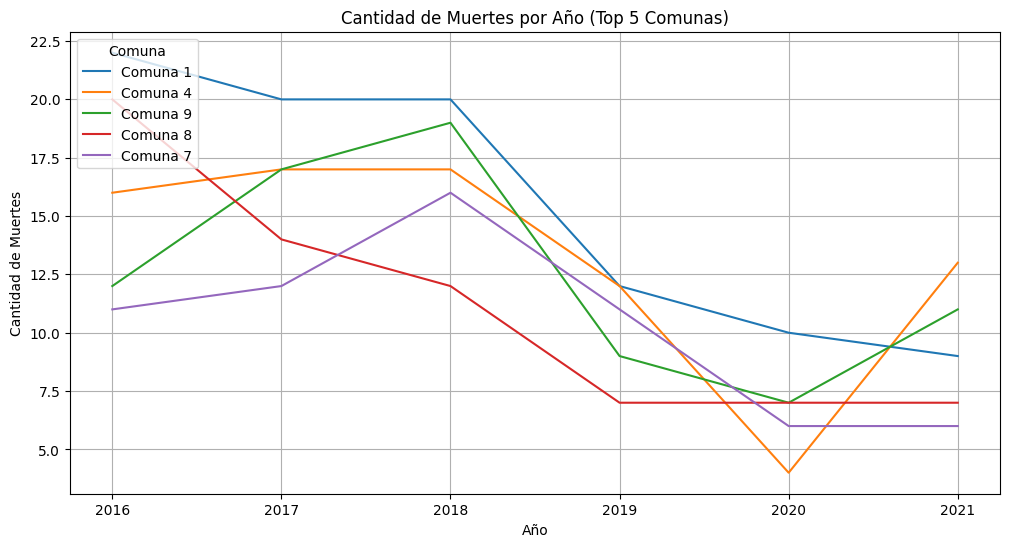

In [38]:
df_facts_homicides['FECHA'] = pd.to_datetime(df_facts_homicides['FECHA'])
muertes_por_ano_y_comuna = df_facts_homicides.groupby([df_facts_homicides['FECHA'].dt.year, 'COMUNA'])['N_VICTIMAS'].sum().reset_index()
muertes_por_ano_y_comuna.rename(columns={'FECHA': 'AÑO'}, inplace=True)

# Obtener las 5 comunas principales
top_5_comunas = muertes_por_ano_y_comuna.groupby('COMUNA')['N_VICTIMAS'].sum().nlargest(5).index

plt.figure(figsize=(12, 6))
for comuna in top_5_comunas:
    data = muertes_por_ano_y_comuna[muertes_por_ano_y_comuna['COMUNA'] == comuna]
    plt.plot(data['AÑO'], data['N_VICTIMAS'], label=f'Comuna {comuna}')

plt.xlabel('Año')
plt.ylabel('Cantidad de Muertes')
plt.title('Cantidad de Muertes por Año (Top 5 Comunas)')
plt.grid(True)
plt.legend(loc='upper left', title='Comuna')
plt.show()

#### Variación cantidad de víctimas de acuerdo a los participantes a través de los años

El siguiente gráfico de lineas muestra la cantidad de víctimas fatales de acuerdo a los participantes y desglosados por año, en donde se puede analizar año por año la variacion que hubo en cuanto a víctimas fatales en las 5 categorías con los indicadores mas altos.

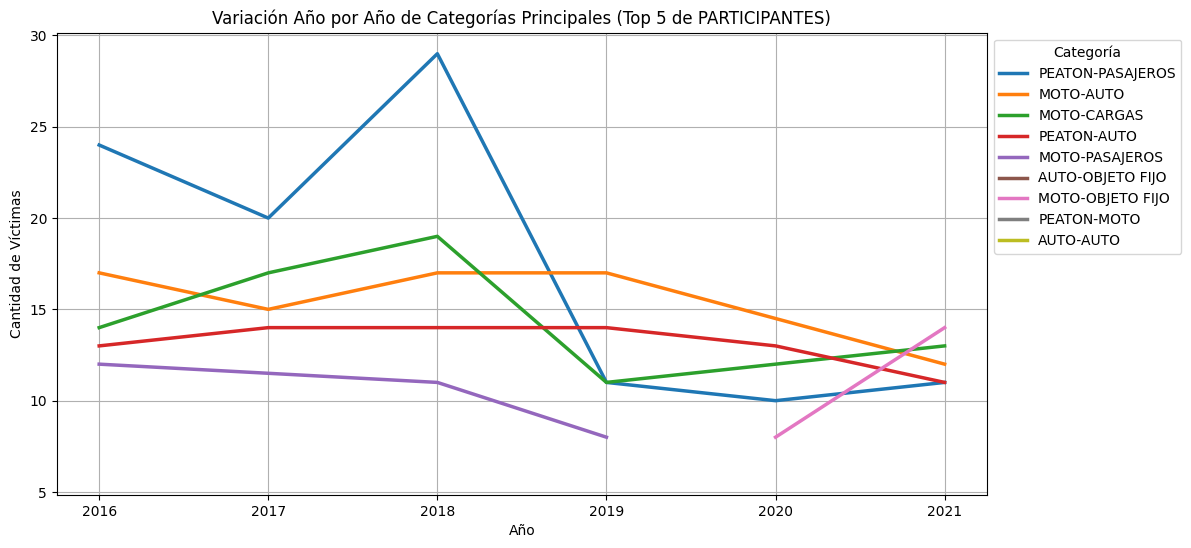

In [39]:
# Agrupar por año y "PARTICIPANTES" y calcular la suma de "N_VICTIMAS" para cada categoría
participantes_por_ano = df_facts_homicides.groupby([df_facts_homicides['AAAA'], 'PARTICIPANTES'])['N_VICTIMAS'].sum().reset_index()

# Encontrar las 5 categorías principales para cada año
top_5_categorias_por_ano = participantes_por_ano.groupby('AAAA').apply(lambda x: x.nlargest(5, 'N_VICTIMAS')).reset_index(drop=True)

# Crear un gráfico de líneas para mostrar la variación año por año para las categorías principales
plt.figure(figsize=(12, 6))
for categoria in top_5_categorias_por_ano['PARTICIPANTES'].unique():
    data = top_5_categorias_por_ano[top_5_categorias_por_ano['PARTICIPANTES'] == categoria]
    plt.plot(data['AAAA'], data['N_VICTIMAS'], label=categoria, linewidth=2.5)  # Hacer la línea más gruesa

plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.title('Variación Año por Año de Categorías Principales (Top 5 de PARTICIPANTES)')
plt.grid(True)
plt.legend(title='Categoría', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### Variación cantidad de víctimas de acuerdo a la victima a través de los años

El siguiente gráfico de lineas muestra la cantidad de víctimas fatales de acuerdo a las víctimas y desglosados por año, en donde se puede analizar año por año la variación que hubo en cuanto a victimas fatales en las 7 categorías con los indicadores mas altos.

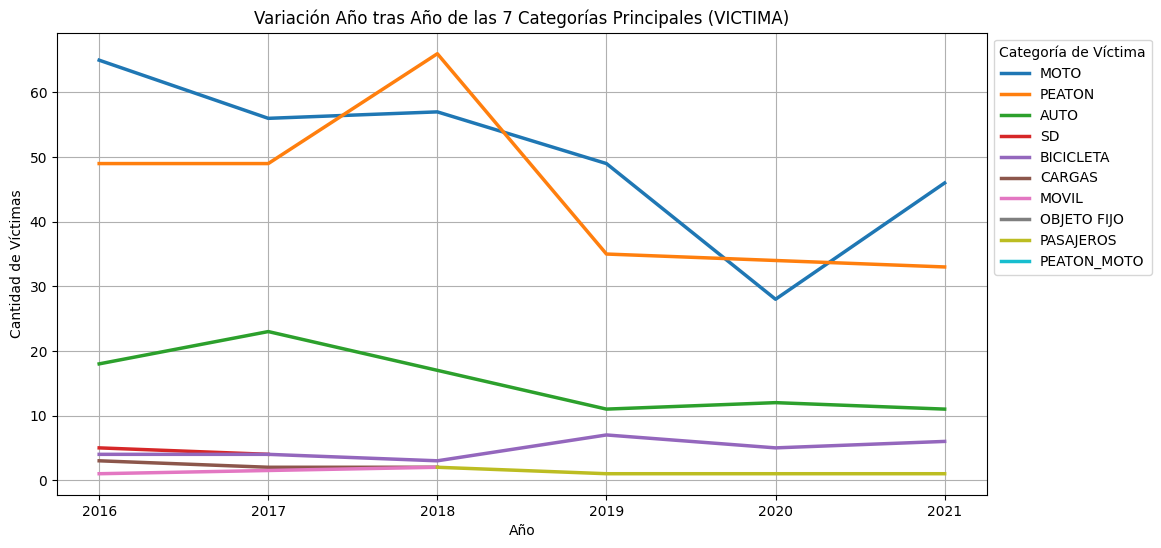

In [40]:
# Agrupar por año y "VICTIMA" y calcular la suma de "N_VICTIMAS" para cada categoría
victimas_por_ano = df_facts_homicides.groupby([df_facts_homicides['AAAA'], 'VICTIMA'])['N_VICTIMAS'].sum().reset_index()

# Encontrar las 7 categorías principales para cada año
top_7_categorias_por_ano = victimas_por_ano.groupby('AAAA').apply(lambda x: x.nlargest(7, 'N_VICTIMAS')).reset_index(drop=True)

# Crear un gráfico de líneas para mostrar la variación año tras año para las categorías principales
plt.figure(figsize=(12, 6))
for categoria in top_7_categorias_por_ano['VICTIMA'].unique():
    data = top_7_categorias_por_ano[top_7_categorias_por_ano['VICTIMA'] == categoria]
    plt.plot(data['AAAA'], data['N_VICTIMAS'], label=categoria, linewidth=2.5)  # Hacer las líneas más gruesas

plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.title('Variación Año tras Año de las 7 Categorías Principales (VICTIMA)')
plt.grid(True)
plt.legend(title='Categoría de Víctima', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### Variación cantidad de víctimas de acuerdo al acusado por años

El siguiente gráfico de lineas muestra la cantidad de víctimas fatales de acuerdo a los acusados y desglosados por año, en donde se puede analizar año por año la variación que hubo en cuanto a víctimas fatales en las 7 categorías con los indicadores mas altos.

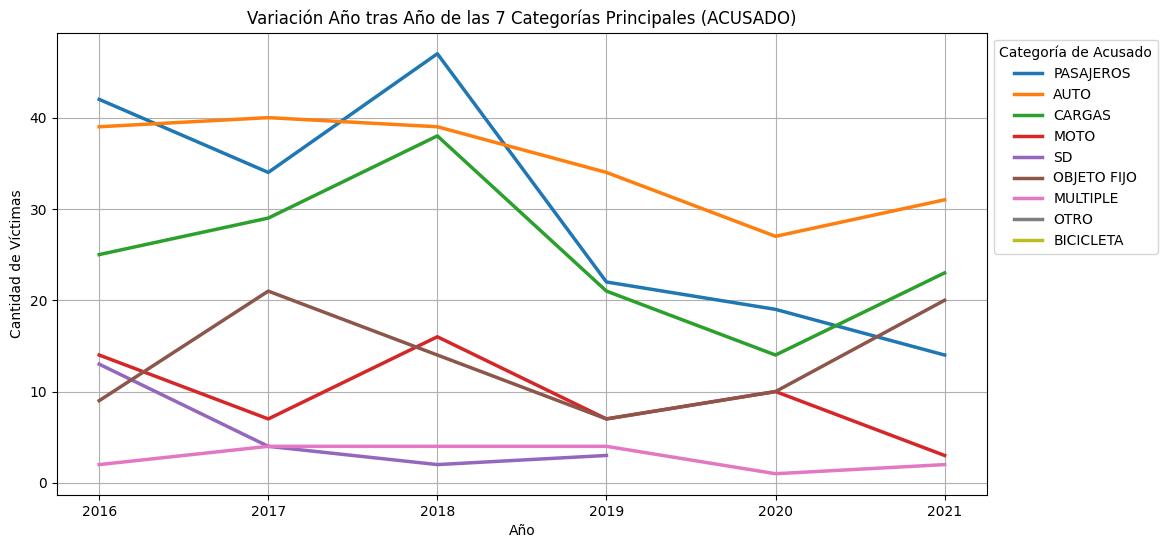

In [41]:
# Agrupar por año y "ACUSADO" y calcular la suma de "N_VICTIMAS" para cada categoría
acusado_por_ano = df_facts_homicides.groupby([df_facts_homicides['AAAA'], 'ACUSADO'])['N_VICTIMAS'].sum().reset_index()

# Encontrar las 7 categorías principales para cada año
top_7_categorias_por_ano = acusado_por_ano.groupby('AAAA').apply(lambda x: x.nlargest(7, 'N_VICTIMAS')).reset_index(drop=True)

# Crear un gráfico de líneas para mostrar la variación año tras año para las categorías principales
plt.figure(figsize=(12, 6))
for categoria in top_7_categorias_por_ano['ACUSADO'].unique():
    data = top_7_categorias_por_ano[top_7_categorias_por_ano['ACUSADO'] == categoria]
    plt.plot(data['AAAA'], data['N_VICTIMAS'], label=categoria, linewidth=2.5)  # Hacer las líneas más gruesas

plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.title('Variación Año tras Año de las 7 Categorías Principales (ACUSADO)')
plt.grid(True)
plt.legend(title='Categoría de Acusado', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### Relacion Cantidad de Víctimas por Tipo de Calle (Discriminando Tipo de Víctima)

Esta gráfica nos muestra la relación de la cantidad de vÍctimas por tipo de calle discriminado por tipo de víctima, donde evidenciamos que en las avenidas y en las calles por ejemplo la mayor cantidad de víctimas son los peatones seguidos de las motos y representan aproximadamente un 80% de víctimas en las dos categorías, estando la categoría peaton un escalon por encima de la categoría moto, por el contrario en las categoría autopista y general paz la categoría moto representa casi un 50% de las víctimas en las dos categorías.

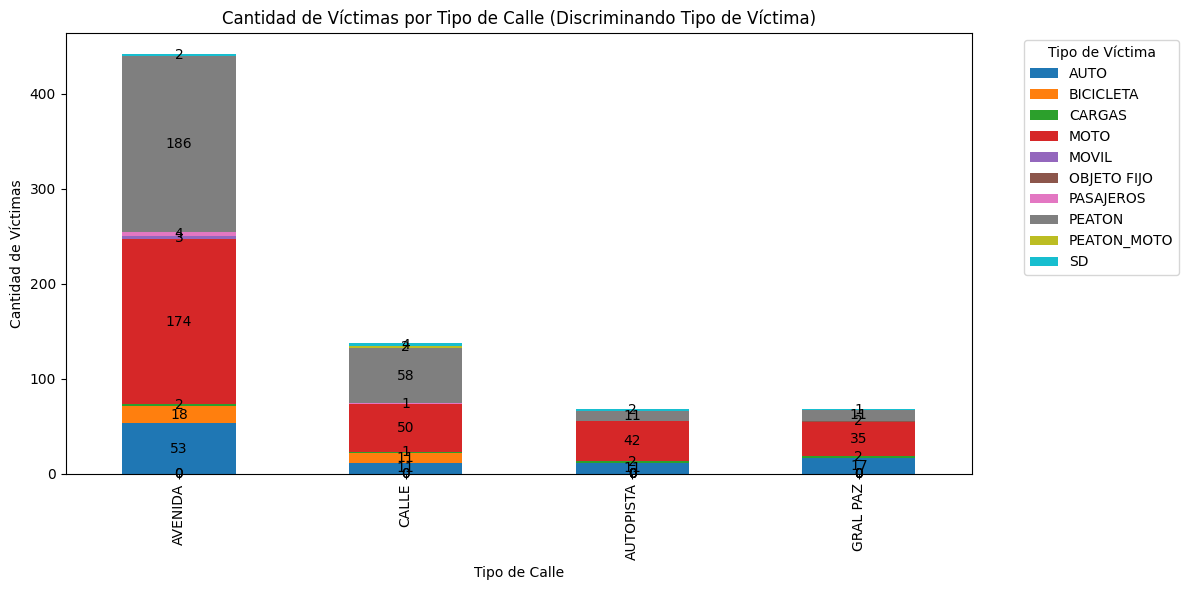

In [5]:
# Agrupar por "TIPO_DE_CALLE" y "VICTIMA" y contar la cantidad de víctimas en cada combinación
calle_victima_counts = df_facts_homicides.groupby(["TIPO_DE_CALLE", "VICTIMA"])["N_VICTIMAS"].sum().reset_index()
# Pivotea los datos para tener "VICTIMA" como columnas
pivot_df_calle_victima = calle_victima_counts.pivot(index="TIPO_DE_CALLE", columns="VICTIMA", values="N_VICTIMAS")
# Suma las filas para obtener el total de víctimas en cada tipo de calle
pivot_df_calle_victima["Total"] = pivot_df_calle_victima.sum(axis=1)
# Ordena las columnas "Tipo de Víctima" de mayor a menor en función del total de víctimas
pivot_df_calle_victima = pivot_df_calle_victima.sort_values(by="Total", ascending=False)
pivot_df_calle_victima = pivot_df_calle_victima.drop(columns=["Total"])
ax_calle_victima = pivot_df_calle_victima.plot(kind="bar", stacked=True, figsize=(12, 6))

# Agregar etiquetas de datos en las barras apiladas
for container in ax_calle_victima.containers:
    ax_calle_victima.bar_label(container, fmt='%d', fontsize=10, color='black', label_type='center')

# Etiquetas y título
plt.xlabel("Tipo de Calle")
plt.ylabel("Cantidad de Víctimas")
plt.title("Cantidad de Víctimas por Tipo de Calle (Discriminando Tipo de Víctima)")

# Leyenda fuera del gráfico
plt.legend(title="Tipo de Víctima", bbox_to_anchor=(1.05, 1), loc="upper left")

# Mostrar el gráfico
plt.tight_layout()
plt.show()


#### Relacion Cantidad de Víctimas por Tipo de Calle (Discriminando Tipo de Acusado)

Y haciendo el mismo análisis pero ahora en la categoría Tipo de Acusado y en la subcategoría avenidas se evidencia una participación muy igualitaria entre el auto y los autos de pasajeros es decir el servicio publico, aportando aproximadamente entre las dos categorías un 60% de las víctimas mortales y tambien en las avenidas, en un escalon por debajo y una participación del 19% esta el transporte de carga. En las calles encontramos practicamente las mismas participaciones de la categorías pero en menor proporción y en la subcategoría autopistas se evidencia que los autos de pasajeros practicamente no tienen participación en cuanto a víctimas siendo en esta subcategoría los vehículos de carga los que mas víctimas mortales generan.

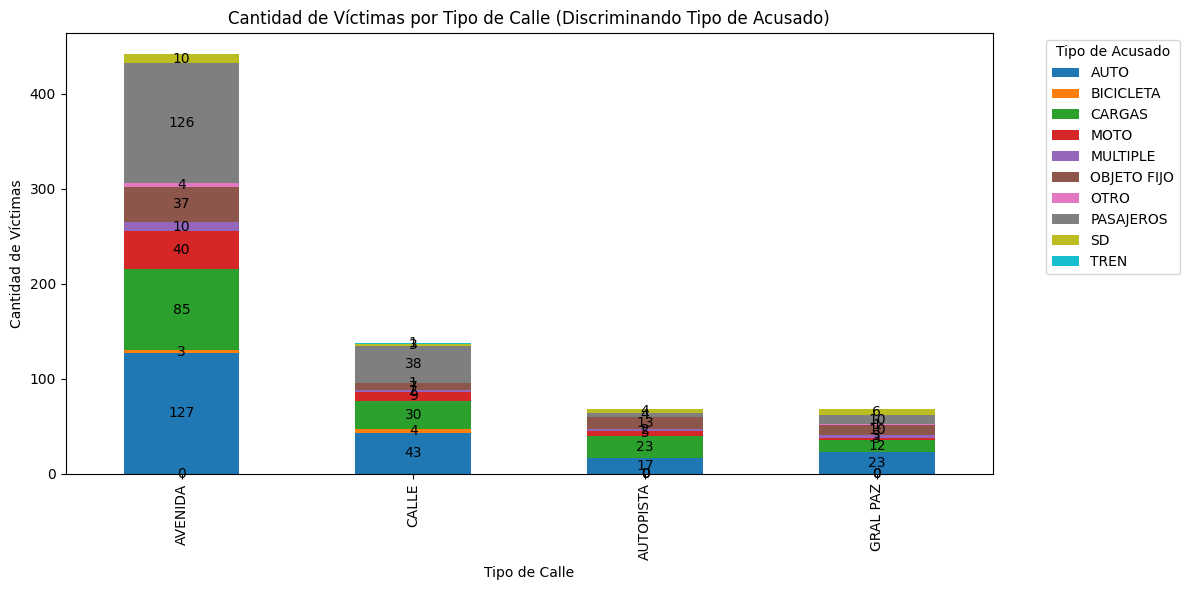

In [42]:
# Agrupar por "TIPO_DE_CALLE" y "ACUSADO" y contar la cantidad de víctimas en cada combinación
calle_acusado_counts = df_facts_homicides.groupby(["TIPO_DE_CALLE", "ACUSADO"])["N_VICTIMAS"].sum().reset_index()

# Pivotea los datos para tener "ACUSADO" como columnas
pivot_df_calle_acusado = calle_acusado_counts.pivot(index="TIPO_DE_CALLE", columns="ACUSADO", values="N_VICTIMAS")

# Suma las filas para ordenar por la suma total de víctimas en cada tipo de calle
pivot_df_calle_acusado["Total"] = pivot_df_calle_acusado.sum(axis=1)

# Ordena las filas por la suma total de víctimas en orden descendente
pivot_df_calle_acusado = pivot_df_calle_acusado.sort_values(by="Total", ascending=False)

# Elimina la columna "Total" después de ordenar
pivot_df_calle_acusado = pivot_df_calle_acusado.drop(columns=["Total"])

# Graficar el gráfico de barras apiladas
ax_calle_acusado = pivot_df_calle_acusado.plot(kind="bar", stacked=True, figsize=(12, 6))

# Agregar etiquetas de datos en las barras apiladas
for container in ax_calle_acusado.containers:
    ax_calle_acusado.bar_label(container, fmt='%d', fontsize=10, color='black', label_type='center')

# Etiquetas y título
plt.xlabel("Tipo de Calle")
plt.ylabel("Cantidad de Víctimas")
plt.title("Cantidad de Víctimas por Tipo de Calle (Discriminando Tipo de Acusado)")

# Leyenda fuera del gráfico
plt.legend(title="Tipo de Acusado", bbox_to_anchor=(1.05, 1), loc="upper left")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Relacion Cantidad de Víctimas por Comuna (Discriminando Tipo de Víctima)

Evidenciamos mediante un gráfico de barras apiladas que en las comunas 1 y 4 el peaton y las motos tienen un porcentaje de participación muy proporcional, sumando entre los dos en cada categoría aproximadamente el 80% de las víctimas y en la comuna 9 podemos evidenciar algo interesante y es que la categoria victima auto se triplico con respecto a las columnas 1 y 4, el resto de categorías si permanecen constantes y con poca variación en el resto de comunas.

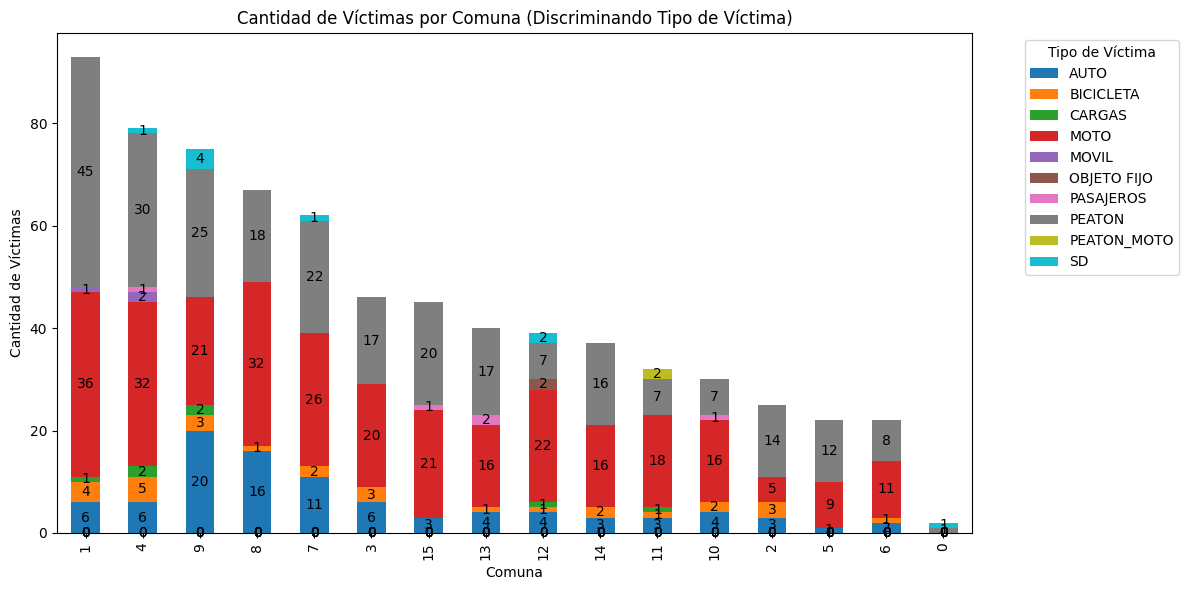

In [43]:
# Agrupa por "COMUNA" y "VICTIMA" y cuenta la cantidad de víctimas en cada combinación
comuna_victima_counts = df_facts_homicides.groupby(["COMUNA", "VICTIMA"])["N_VICTIMAS"].sum().reset_index()

# Pivotear los datos para tener "VICTIMA" como columnas
pivot_df = comuna_victima_counts.pivot(index="COMUNA", columns="VICTIMA", values="N_VICTIMAS")

# Sumar las filas para ordenar por la suma total de víctimas
pivot_df["Total"] = pivot_df.sum(axis=1)

# Ordenar las filas por la suma total de víctimas en orden descendente
pivot_df = pivot_df.sort_values(by="Total", ascending=False)

# Eliminar la columna "Total" después de ordenar
pivot_df = pivot_df.drop(columns=["Total"])

# Graficar el gráfico de barras apiladas
ax = pivot_df.plot(kind="bar", stacked=True, figsize=(12, 6))

# Agregar etiquetas de datos en las barras apiladas
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, color='black', label_type='center')

# Etiquetas y título
plt.xlabel("Comuna")
plt.ylabel("Cantidad de Víctimas")
plt.title("Cantidad de Víctimas por Comuna (Discriminando Tipo de Víctima)")

# Leyenda fuera del gráfico
plt.legend(title="Tipo de Víctima", bbox_to_anchor=(1.05, 1), loc="upper left")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Relacion Cantidad de Víctimas por Comuna (Discriminando Tipo de Acusado)

Y realizando la discriminación por tipo de acusado, se puede evidenciar que los autos son los que en aproximadamente un 80% de las comunas tienen el porcentaje de participación mas alta, unicamente sobrepasandolo la categoría pasajeros en la comuna 1 la categoría cargas en la comuna 4.

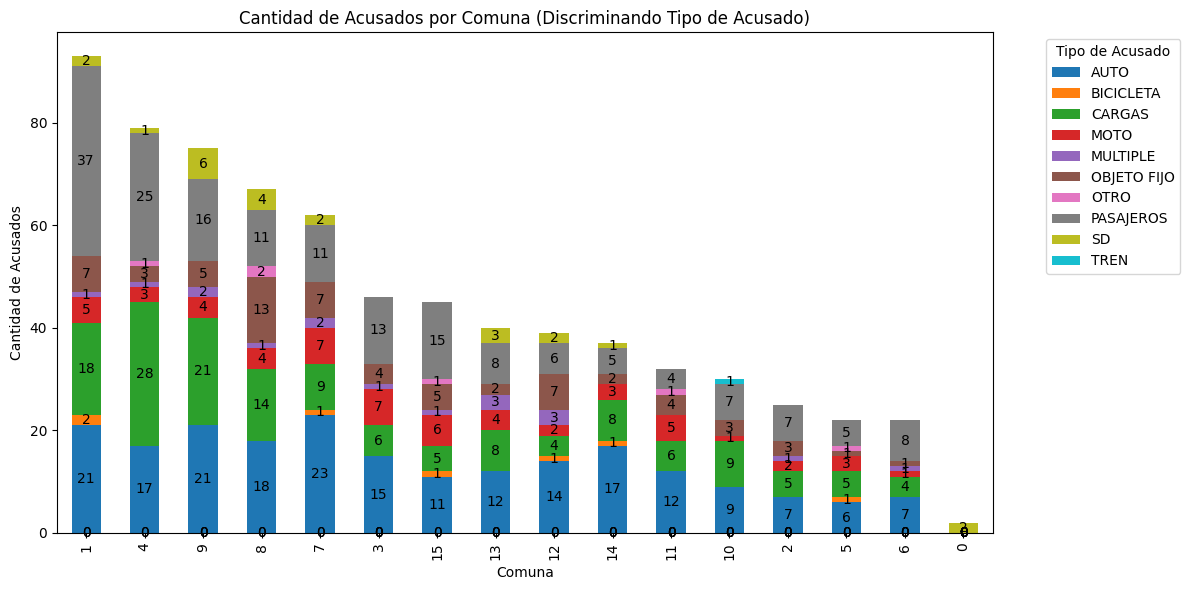

In [44]:
#Primero, agrupa por "COMUNA" y "ACUSADO" y cuenta la cantidad de acusados en cada combinación:
comuna_acusado_counts = df_facts_homicides.groupby(["COMUNA", "ACUSADO"])["N_VICTIMAS"].sum().reset_index()
# A continuación, pivotea los datos para tener "ACUSADO" como columnas:
pivot_df_acusado = comuna_acusado_counts.pivot(index="COMUNA", columns="ACUSADO", values="N_VICTIMAS")
# Suma las filas para ordenar por la suma total de acusados:
pivot_df_acusado["Total"] = pivot_df_acusado.sum(axis=1)
#Ordena las filas por la suma total de acusados en orden descendente:
pivot_df_acusado = pivot_df_acusado.sort_values(by="Total", ascending=False)
# Elimina la columna "Total" después de ordenar:
pivot_df_acusado = pivot_df_acusado.drop(columns=["Total"])
# Finalmente, grafica el gráfico de barras apiladas para la columna "ACUSADO":
ax_acusado = pivot_df_acusado.plot(kind="bar", stacked=True, figsize=(12, 6))

# Agregar etiquetas de datos en las barras apiladas
for container in ax_acusado.containers:
    ax_acusado.bar_label(container, fmt='%d', fontsize=10, color='black', label_type='center')

# Etiquetas y título
plt.xlabel("Comuna")
plt.ylabel("Cantidad de Acusados")
plt.title("Cantidad de Acusados por Comuna (Discriminando Tipo de Acusado)")

# Leyenda fuera del gráfico
plt.legend(title="Tipo de Acusado", bbox_to_anchor=(1.05, 1), loc="upper left")

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## EDA DF_VICTIMS_HOMICIDE

Se procede a realizar el EDA a la hoja víctimas del archivo homicidios.xlsx 

Realizamos importación de datos

In [45]:
sheet_name = pd.ExcelFile('02_Data/homicidios.xlsx').sheet_names[2]
df_victims_homicide = pd.read_excel('02_Data/homicidios.xlsx', sheet_name=sheet_name)

Verificamos la cabezera del contenido del dataframe

In [46]:
df_victims_homicide.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


### Resumen del Dataframe

Realizamos una pequeña inspección del dataframe.

In [47]:
df_victims_homicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


### Verificación de outliers

Se verifica si hay outliers dentro de las columnas con tipo de dato número

c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\haide\OneDrive\Documentos\04_Bootcamp_Henry_2023\02_Bootcamp_Henry\07_Labs\03_Proyecto_02\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

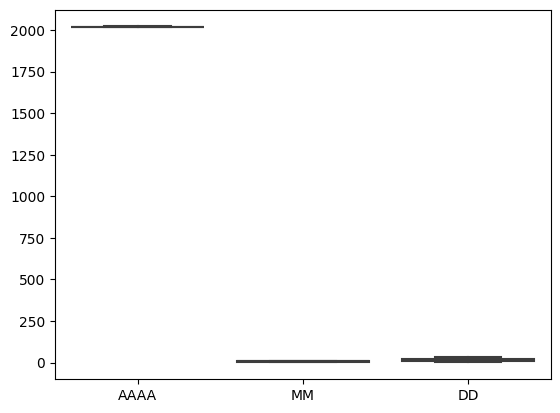

In [48]:
# Selecciona las dos columnas que deseas analizar
select_columns_outliers_victims_homicide = ["AAAA", "MM", "DD", "EDAD"]
df_victims_homicides_outliers = df_victims_homicide[select_columns_outliers_victims_homicide]

# Crea un box plot para visualizar los outliers de las columnas seleccionadas
sns.boxplot(data=df_victims_homicides_outliers)
plt.show()

### Verificación registros duplicados

Se verifica la existencia de registros duplicados dentro del dataframe.

In [49]:
duplicates_rows_victims_homicides = df_victims_homicide[df_victims_homicide.duplicated()]
duplicates_rows_victims_homicides

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


## Gráficas para analizar las variables

### Cantidad de víctimas mortales de acuerdo al rol que desempeñaba

Este gráfico de barras nos muestra la cantidad de víctimas mortales de acuerdo a su rol en el accidente, evidenciando que cerca al 50 % de los roles que desempeñaba la víctima era el de conductor, seguido del peaton con una couta de participación tambien alta, un 37.24%  y ya en un escalón muy por debajo se encuentra el pasajero_acompañante con un 11.16% de participación.

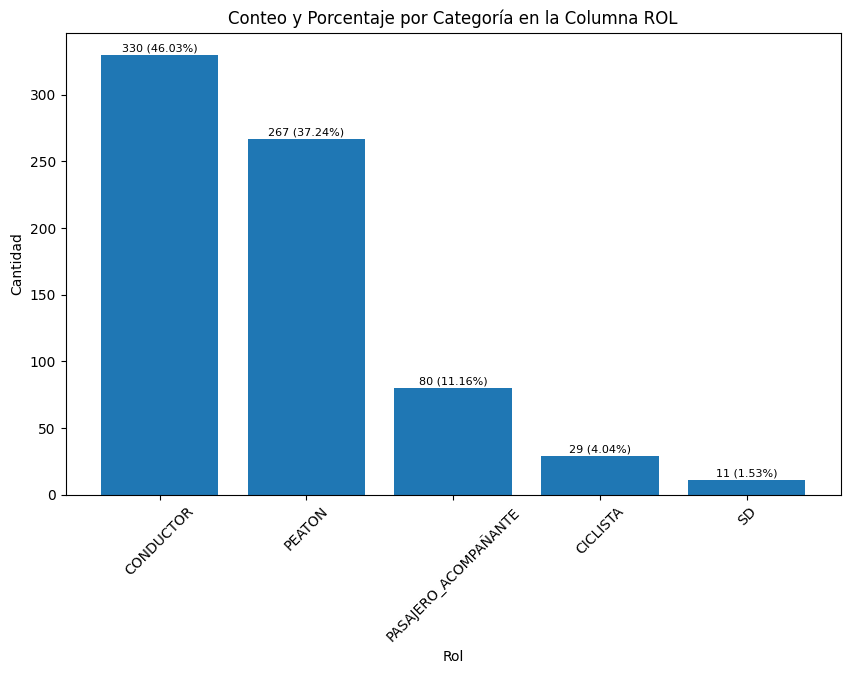

In [50]:
# Agrupar por la columna "ROL" y contar la cantidad de ocurrencias en cada categoría
conteo_por_rol = df_victims_homicide['ROL'].value_counts().reset_index()

# Renombrar las columnas
conteo_por_rol.columns = ['ROL', 'Cantidad']

# Calcular el porcentaje
conteo_por_rol['Porcentaje'] = (conteo_por_rol['Cantidad'] / conteo_por_rol['Cantidad'].sum()) * 100

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(conteo_por_rol['ROL'], conteo_por_rol['Cantidad'])
plt.xlabel('Rol')
plt.ylabel('Cantidad')
plt.title('Conteo y Porcentaje por Categoría en la Columna ROL')

# Agregar etiquetas de datos de cantidad y porcentaje
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{int(yval)} ({conteo_por_rol[conteo_por_rol["Cantidad"] == int(yval)]["Porcentaje"].iloc[0]:.2f}%)', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45)  # Rotar etiquetas del eje x para una mejor legibilidad
plt.show()

Ahora se realiza un gráfico de lineas para analizar el comportamiento de cada uno de estos roles durante todos los años analizados, evidenciando que el rol de peaton en los últimos dos años tiende a la baja y normalización mientras que las victimas en el rol de conductor si bien estuvo tambien a la baja entre el 2016 al 2020 el último volvió a aumentar considerablemente.

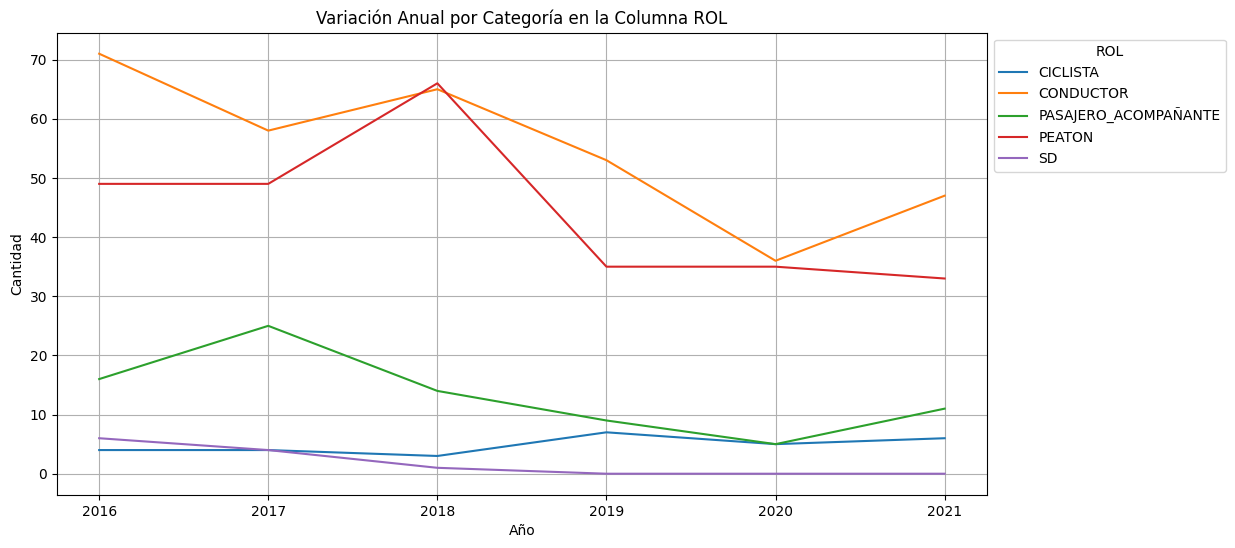

In [51]:
# Convierte la columna "FECHA" a tipo datetime si aún no está en ese formato
df_victims_homicide['FECHA'] = pd.to_datetime(df_victims_homicide['FECHA'])

# Extrae el año de la columna "FECHA" y agrupa por año y "ROL" contando la cantidad de ocurrencias en cada categoría
conteo_por_rol_y_anio = df_victims_homicide.groupby([df_victims_homicide['FECHA'].dt.year, 'ROL'])['ROL'].count().unstack(fill_value=0)

# Crea un gráfico de líneas para mostrar la variación año por año para cada categoría en la columna "ROL"
plt.figure(figsize=(12, 6))
for rol in conteo_por_rol_y_anio.columns:
    plt.plot(conteo_por_rol_y_anio.index, conteo_por_rol_y_anio[rol], label=rol)

plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Variación Anual por Categoría en la Columna ROL')
plt.legend(title='ROL', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

### Cantidad de víctimas mortales de acuerdo al tipo de víctima

Este gráfico de barras nos muestra la cantidad de víctimas mortales de acuerdo al tipo de víctima, evidenciando que los motociclistas y el peaton tienen una cuota de aprox el 80% entre los dos con 42.26% y 37.24% respectivamente seguidos de los autos y las bicicletas.

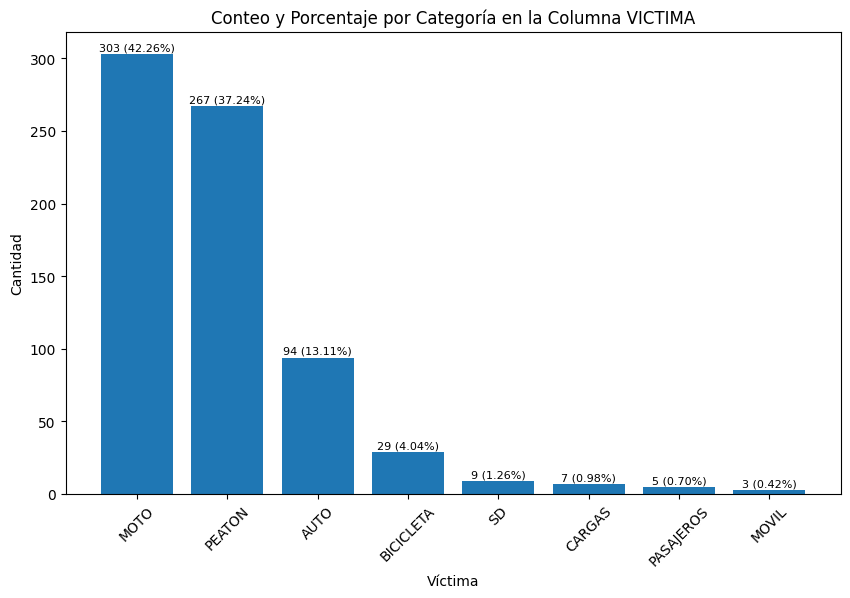

In [52]:
# Agrupar por la columna "VICTIMA" y contar la cantidad de ocurrencias en cada categoría
conteo_por_victima = df_victims_homicide['VICTIMA'].value_counts().reset_index()

# Renombrar las columnas
conteo_por_victima.columns = ['VICTIMA', 'Cantidad']

# Calcular el porcentaje
conteo_por_victima['Porcentaje'] = (conteo_por_victima['Cantidad'] / conteo_por_victima['Cantidad'].sum()) * 100

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(conteo_por_victima['VICTIMA'], conteo_por_victima['Cantidad'])
plt.xlabel('Víctima')
plt.ylabel('Cantidad')
plt.title('Conteo y Porcentaje por Categoría en la Columna VICTIMA')

# Agregar etiquetas de datos de cantidad y porcentaje
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{int(yval)} ({conteo_por_victima[conteo_por_victima["Cantidad"] == int(yval)]["Porcentaje"].iloc[0]:.2f}%)', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45)  # Rotar etiquetas del eje x para una mejor legibilidad
plt.show()

Ahora se realiza un gráfico de lineas para analizar el comportamiento de cada uno de estas categorias en el transcurso de todos los años analizados, evidenciando que la categoría de peaton en el ultimo año tiende a la baja y normalización mientras que la categoría moto estuvo en crecimiento en el último año.

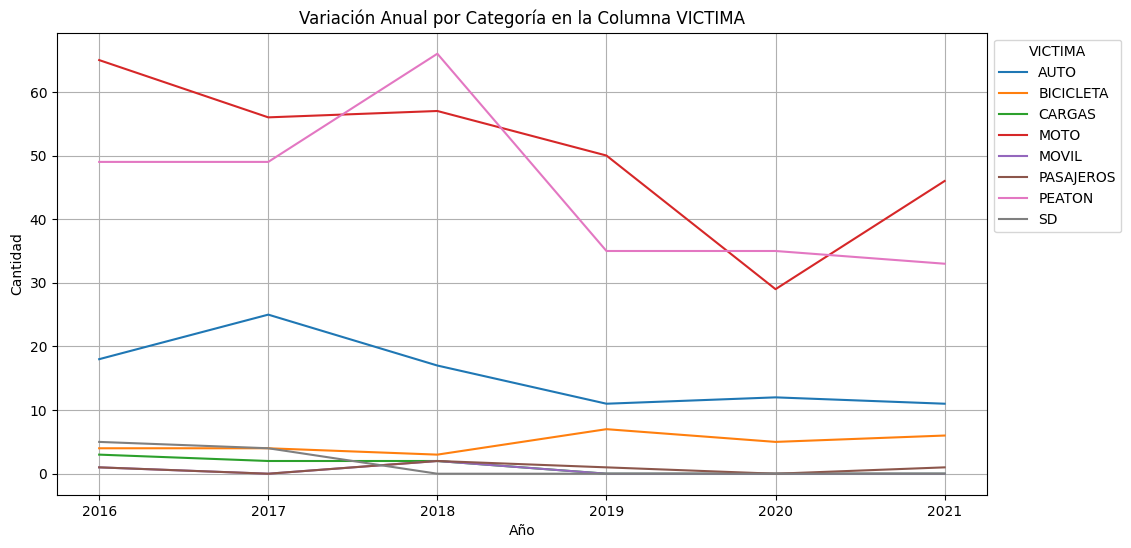

In [53]:
# Convierte la columna "FECHA" a tipo datetime si aún no está en ese formato
df_victims_homicide['FECHA'] = pd.to_datetime(df_victims_homicide['FECHA'])

# Extrae el año de la columna "FECHA" y agrupa por año y "VICTIMA" contando la cantidad de ocurrencias en cada categoría
conteo_por_victima_y_anio = df_victims_homicide.groupby([df_victims_homicide['FECHA'].dt.year, 'VICTIMA'])['VICTIMA'].count().unstack(fill_value=0)

# Crea un gráfico de líneas para mostrar la variación año por año para cada categoría en la columna "VICTIMA"
plt.figure(figsize=(12, 6))
for victima in conteo_por_victima_y_anio.columns:
    plt.plot(conteo_por_victima_y_anio.index, conteo_por_victima_y_anio[victima], label=victima)

plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Variación Anual por Categoría en la Columna VICTIMA')
plt.legend(title='VICTIMA', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

### Cantidad de víctimas mortales de acuerdo al sexo

En el siguiente gráfico de barras evidenciamos que el sexo masculino sobrepasa con creces en cuanto a víctimas mortales al género femenino, con una cuota del 76% mientras contra un 23.15% del género femenino, aproximadamente la cantidad de víctimas masculinas se triplica con respecto a víctimas femeninas.

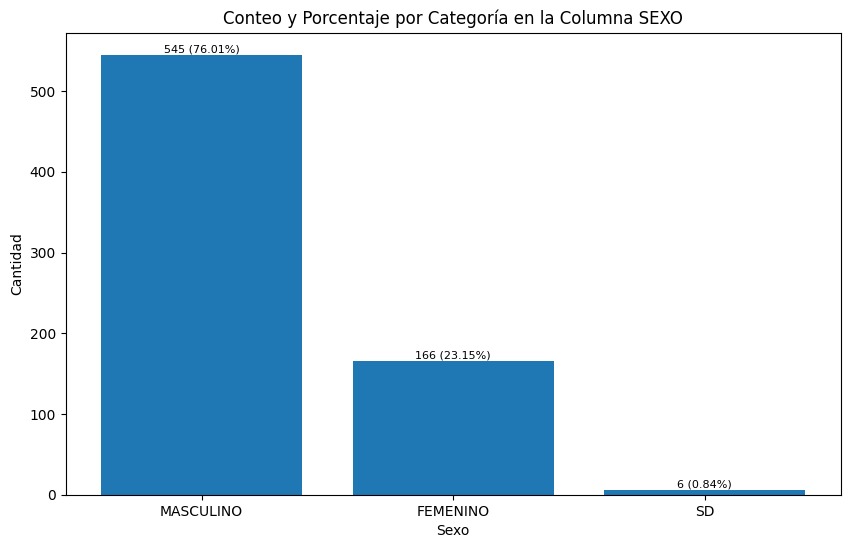

In [54]:
# Agrupar por la columna "SEXO" y contar la cantidad de ocurrencias en cada categoría
conteo_por_sexo =df_victims_homicide['SEXO'].value_counts().reset_index()
 
# Renombrar las columnas
conteo_por_sexo.columns = ['SEXO', 'Cantidad']

# Calcular el porcentaje
conteo_por_sexo['Porcentaje'] = (conteo_por_sexo['Cantidad'] / conteo_por_sexo['Cantidad'].sum()) * 100

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(conteo_por_sexo['SEXO'], conteo_por_sexo['Cantidad'])
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.title('Conteo y Porcentaje por Categoría en la Columna SEXO')

# Agregar etiquetas de datos de cantidad y porcentaje
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{int(yval)} ({conteo_por_sexo[conteo_por_sexo["Cantidad"] == int(yval)]["Porcentaje"].iloc[0]:.2f}%)', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=0)  # No es necesario rotar etiquetas en este caso
plt.show()

E igualmente se realiza un gráfico de lineas para analizar su comportamiento a lo largo de los 6 años de estudio mostrando casi una curvatura identica tanta el genero femenino como masculino y con un leve aumento de los dos generos en el último año.

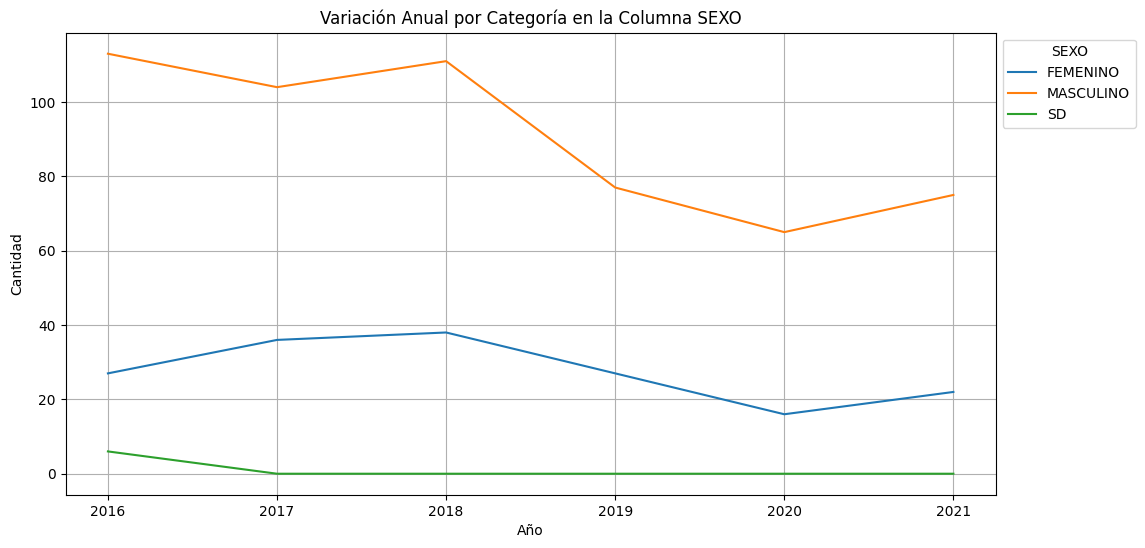

In [55]:
# Convierte la columna "FECHA" a tipo datetime si aún no está en ese formato
df_victims_homicide['FECHA'] = pd.to_datetime(df_victims_homicide['FECHA'])

# Extrae el año de la columna "FECHA" y agrupa por año y "SEXO" contando la cantidad de ocurrencias en cada categoría
conteo_por_sexo_y_anio = df_victims_homicide.groupby([df_victims_homicide['FECHA'].dt.year, 'SEXO'])['SEXO'].count().unstack(fill_value=0)

# Crea un gráfico de líneas para mostrar la variación año por año para cada categoría en la columna "SEXO"
plt.figure(figsize=(12, 6))
for sexo in conteo_por_sexo_y_anio.columns:
    plt.plot(conteo_por_sexo_y_anio.index, conteo_por_sexo_y_anio[sexo], label=sexo)

plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Variación Anual por Categoría en la Columna SEXO')
plt.legend(title='SEXO', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

### Cantidad de víctimas mortales de acuerdo a un rango de edad

En este apartado realizamos un gráfico para analizar las víctimas fatales de acuerdo a un rango de edad evidenciando que aproximadamente un 50% de las víctimas fatales estan entre el rango de los 20 a 40 años siendo la categoría 25 a 30 años, la categoría con mayor víctimas, un 13.86%, seguida muy de cerca del rango 20 a 25 con un 13.40%

C:\Users\haide\AppData\Local\Temp\ipykernel_15036\1717346372.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RANGO_EDAD'] = pd.cut(df['EDAD'], bins=rangos_edad, right=False)


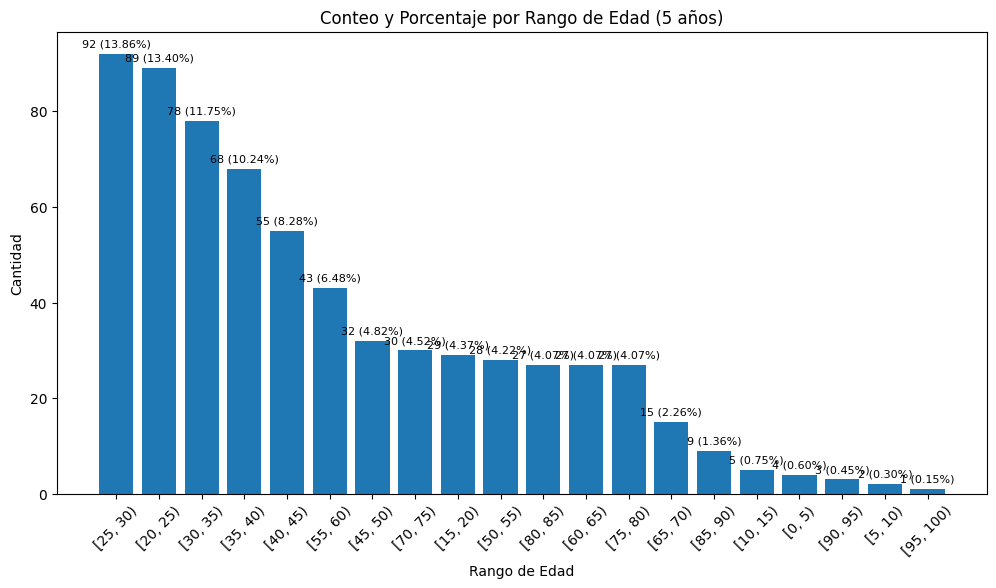

In [62]:
df_victims_homicide_copy = df_victims_homicide.copy() 
# Eliminar valores no numéricos de la columna "EDAD" y convertir a entero
df_victims_homicide_copy['EDAD'] = pd.to_numeric(df_victims_homicide_copy['EDAD'], errors='coerce')  # Los valores no numéricos se convertirán a NaN

# Eliminar filas con valores NaN en la columna "EDAD"
df = df_victims_homicide_copy.dropna(subset=['EDAD'])

# Definir los rangos de edad de 5 años
rangos_edad = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

# Crear una nueva columna "RANGO_EDAD" en el DataFrame asignando a cada fila el rango correspondiente
df['RANGO_EDAD'] = pd.cut(df['EDAD'], bins=rangos_edad, right=False)

# Agrupar por el rango de edad y contar la cantidad de ocurrencias en cada categoría
conteo_por_edad = df['RANGO_EDAD'].value_counts().reset_index()

# Renombrar las columnas
conteo_por_edad.columns = ['RANGO_EDAD', 'Cantidad']

# Calcular el porcentaje
conteo_por_edad['Porcentaje'] = (conteo_por_edad['Cantidad'] / conteo_por_edad['Cantidad'].sum()) * 100

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(conteo_por_edad['RANGO_EDAD'].astype(str), conteo_por_edad['Cantidad'])
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad')
plt.title('Conteo y Porcentaje por Rango de Edad (5 años)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para una mejor legibilidad

# Agregar etiquetas de datos de cantidad y porcentaje
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{int(yval)} ({conteo_por_edad[conteo_por_edad["Cantidad"] == int(yval)]["Porcentaje"].iloc[0]:.2f}%)', ha='center', va='bottom', fontsize=8)

plt.show()

Adicionalmente y como se hizo en los gráficos anteriores se realizo un gráfica de lineas para analizar su evolucion en el tiempo evidenciando que en el ultimo año 7 de las 10 categorias que se contemplo para el análisis estan en crecimiento.

C:\Users\haide\AppData\Local\Temp\ipykernel_15036\3144141974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FECHA'] = pd.to_datetime(df['FECHA'])
C:\Users\haide\AppData\Local\Temp\ipykernel_15036\3144141974.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_por_edad_y_anio = df.groupby([df_victims_homicide_copy['FECHA'].dt.year, 'RANGO_EDAD'])['RANGO_EDAD'].count().unstack(fill_value=0)


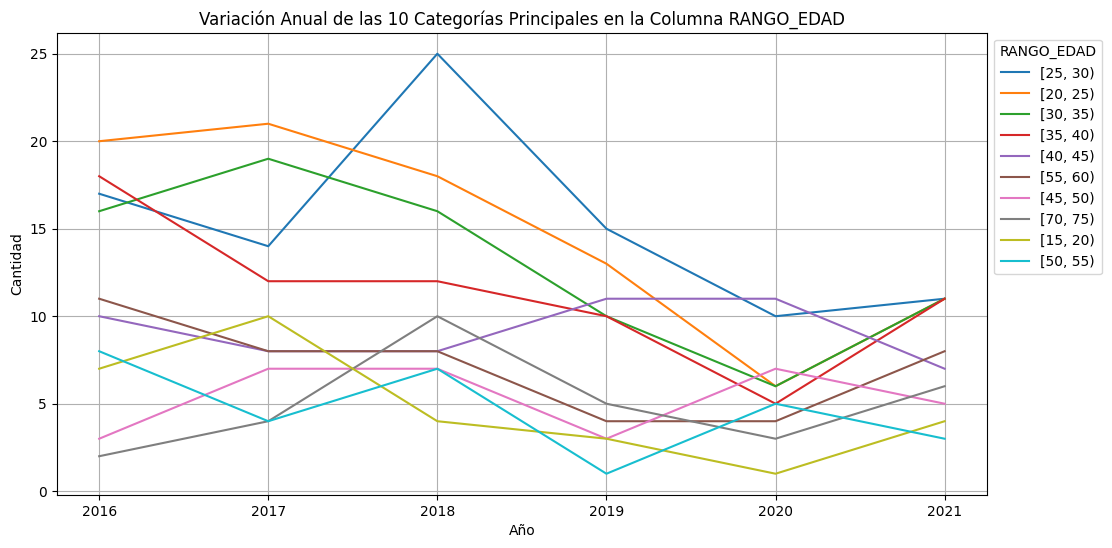

In [63]:
# Convierte la columna "FECHA" a tipo datetime si aún no está en ese formato
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Extrae el año de la columna "FECHA" y agrupa por año y "RANGO_EDAD" contando la cantidad de ocurrencias en cada categoría
conteo_por_edad_y_anio = df.groupby([df_victims_homicide_copy['FECHA'].dt.year, 'RANGO_EDAD'])['RANGO_EDAD'].count().unstack(fill_value=0)

# Selecciona las 10 categorías principales en función de la suma total
top_10_categorias_por_anio = conteo_por_edad_y_anio.sum().nlargest(10).index

# Filtra el DataFrame para incluir solo las 10 categorías principales
conteo_por_edad_y_anio_top_10 = conteo_por_edad_y_anio[top_10_categorias_por_anio]

# Crea un gráfico de líneas para mostrar la variación año por año para las 10 categorías principales en la columna "RANGO_EDAD"
plt.figure(figsize=(12, 6))
for categoria in conteo_por_edad_y_anio_top_10.columns:
    plt.plot(conteo_por_edad_y_anio_top_10.index, conteo_por_edad_y_anio_top_10[categoria], label=categoria)

plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Variación Anual de las 10 Categorías Principales en la Columna RANGO_EDAD')
plt.legend(title='RANGO_EDAD', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()